In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [2]:
display (os.getcwd())

'C:\\Users\\HP\\ML acme practice\\Stock Price Prediction Project_python_ml\\PRJ Stock Price Prediction'

In [3]:
df =pd.read_csv("prices.csv", header=0)
display (df)


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [4]:
print(df.shape)

(851264, 7)


In [5]:
print(df.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [6]:
df.symbol.value_counts()

MCHP    1762
TROW    1762
CMA     1762
AJG     1762
IR      1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [7]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [8]:
display(df.symbol.unique().shape)

(501,)

In [9]:
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [10]:
print(len(df.symbol.values))

851264


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [12]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [13]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [14]:
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [15]:
pd.DataFrame(df.date.unique())

,0
0,2016-01-05 00:00:00
1,2016-01-06 00:00:00
2,2016-01-07 00:00:00
3,2016-01-08 00:00:00
4,2016-01-11 00:00:00
...,...
3519,2016-12-23
3520,2016-12-27
3521,2016-12-28
3522,2016-12-29


In [16]:
df.duplicated().sum()

0

In [17]:
#Calling the file in nyse named securities.csv, It has the company details 
comp_info = pd.read_csv('securities.csv')
comp_info


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [18]:
comp_info["Ticker symbol"].nunique()

505

In [19]:
comp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [20]:
comp_info.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [21]:
comp_info.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [22]:
comp_info.loc[comp_info.Security.str.startswith('Face') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [23]:
comp_info.loc[comp_info.Security.str.startswith('Acc') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373


In [24]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)


6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


In [25]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') ] 
display(comp_plot)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",05-05-1997,796343
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801
212,GS,Goldman Sachs Group,reports,Financials,Investment Banking & Brokerage,"New York, New York",NaN,886982
306,MSFT,Microsoft Corp.,reports,Information Technology,Systems Software,"Redmond, Washington",01-06-1994,789019
496,XRX,Xerox Corp.,reports,Information Technology,IT Consulting & Other Services,"Norwalk, Connecticut",NaN,108772
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006


In [26]:
for i in comp_plot:
    print (i)


Ticker symbol
Security
SEC filings
GICS Sector
GICS Sub Industry
Address of Headquarters
Date first added
CIK


In [27]:
def plotter(code):
    # Function used to create graphs for 6 companies 
    global closing_stock ,opening_stock
    #creating plot of all 6 company for opening and closing stock  total 12 graphs
    # Below statement create 2X2 empty chart 
    f, axs = plt.subplots(2,2,figsize=(15,8))
    # total 12 graphs
    # creating plot opening prize of particular company
    plt.subplot(212)
    #taking name of the company as code, get all records related to one company
    company = df[df['symbol']==code]
    #taking the values of one company and taking its open column values to 1D array
    company = company.open.values.astype('float32')
    #reshaping the open stock value from 1D  to 2D .
    company = company.reshape(-1, 1)
    # putting the value of company in opening_stock 
    opening_stock = company
    # plotting the data with green graph between "Time" and "prices vs time"
    
    plt.grid(True)# enalbling the grid in graph
    plt.xlabel('Time') # setting X axis as time
    # setting Y axis as company name + open stock prices
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time') # setting title
    plt.plot(company , 'g') # calling the graph with green graph line
    
    # creating plot closing prize of particular company
    plt.subplot(211)
    #taking name of the company as code
    company_close = df[df['symbol']==code]
    #taking the values of one company and taking its close column values
    company_close = company_close.close.values.astype('float32')
    #reshaping the open column value in 1D and calling it closing_stock
   # -1 for unknown dimension
    company_close = company_close.reshape(-1, 1)
    # putting company_close value in closing_stock 
    closing_stock = company_close
    # plotting the data graph between "Time" and "prices vs time"
    plt.xlabel('Time') # setting x axis as time
    plt.ylabel(code + " close stock prices")# setting y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title as price vs time
    plt.grid(True) # enabling the grid in graph
    plt.plot(company_close , 'b') #creating the data graph in blue graph line
    plt.show() # calling the graph



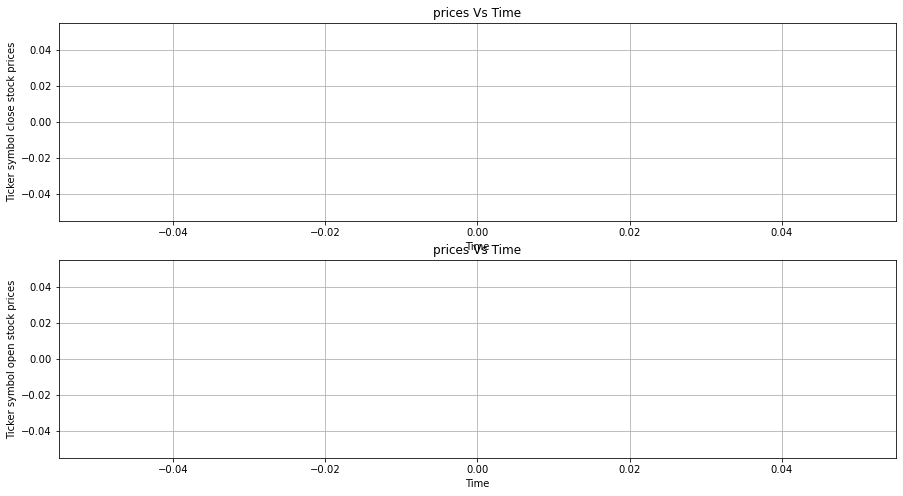

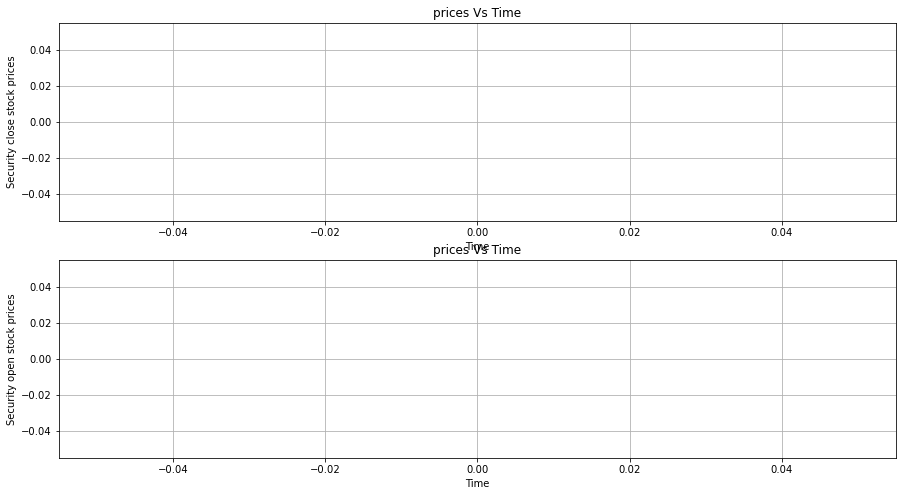

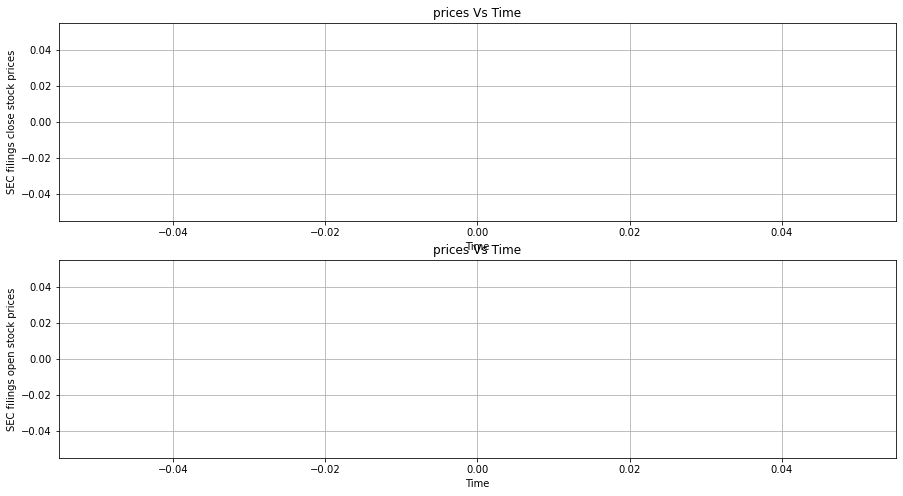

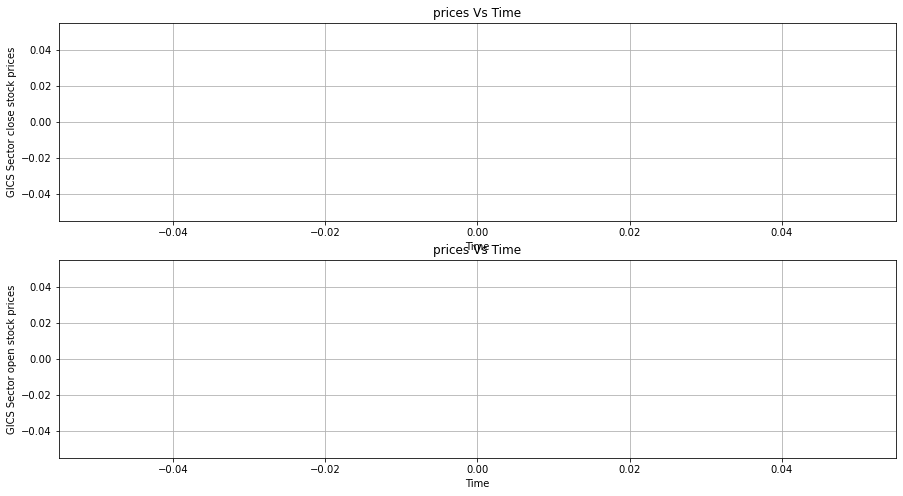

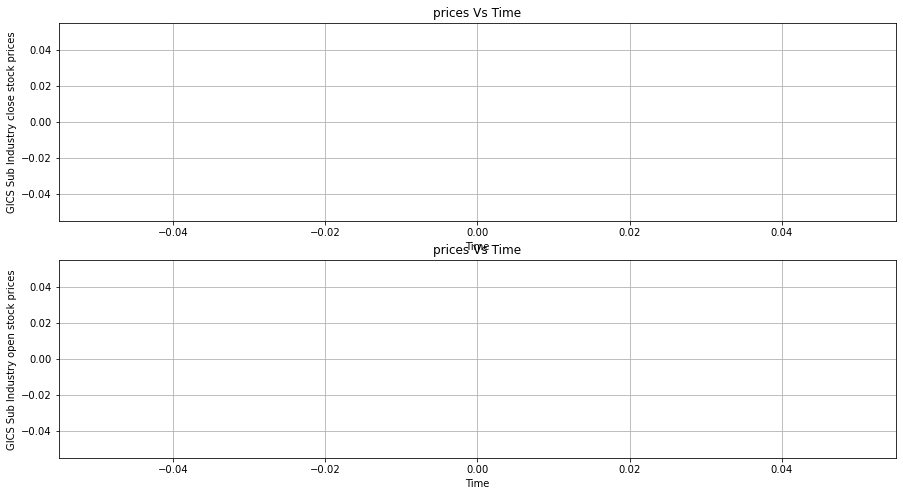

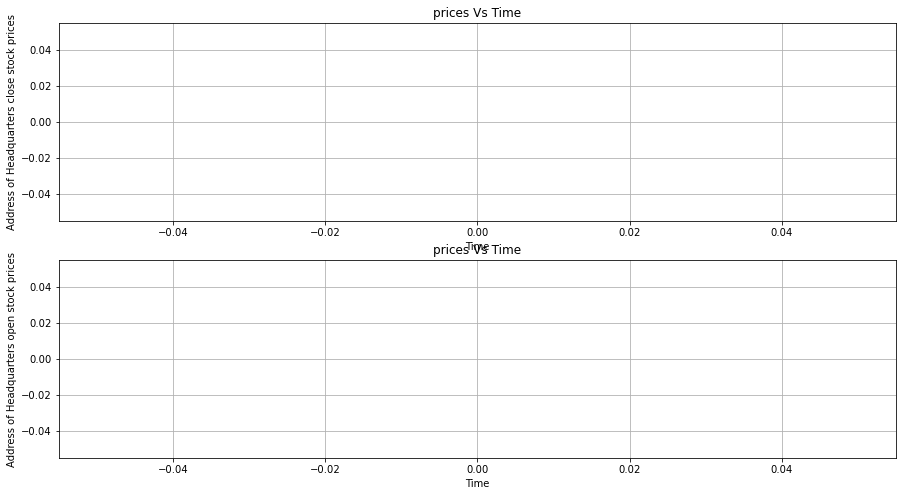

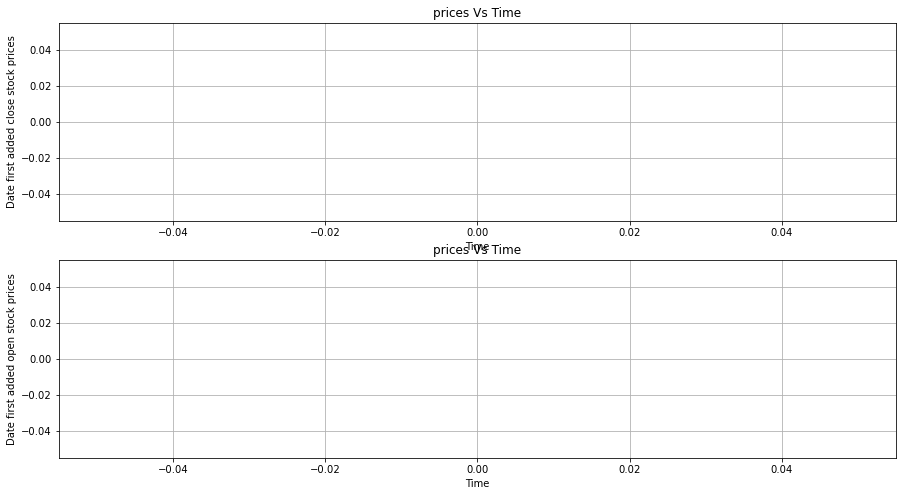

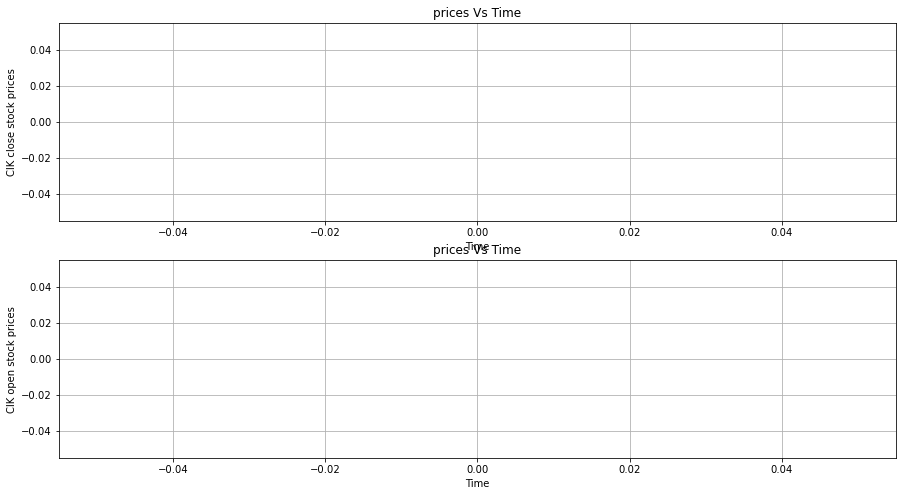

In [28]:
for i in comp_plot:
    plotter(i)


In [29]:
stocks= np.array (df[df.symbol.isin (['YHOO'])].close)
print(stocks)


[17.1      17.23     17.17     ... 38.73     38.639999 38.669998]


In [30]:
display (stocks.shape)

(1762,)

In [31]:
stocks = stocks.reshape(len(stocks) , 1)
print (stocks.shape)
print(stocks)


(1762, 1)
[[17.1     ]
 [17.23    ]
 [17.17    ]
 ...
 [38.73    ]
 [38.639999]
 [38.669998]]


In [32]:
from sklearn.preprocessing import MinMaxScaler
#scaling features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks = scaler.fit_transform(stocks) 
display (stocks)


array([[0.14559109],
       [0.14874031],
       [0.14728683],
       ...,
       [0.66957366],
       [0.6673934 ],
       [0.66812012]])

In [33]:
print (stocks.shape) 

(1762, 1)


In [34]:
train = int(len(stocks) * 0.80)
print (train)


1409


In [35]:
test = len(stocks) - train 
print (test)


353


In [36]:
train = stocks[0:train]
display (train.shape)
print(train)


(1409, 1)

[[0.14559109]
 [0.14874031]
 [0.14728683]
 ...
 [0.63372095]
 [0.61458332]
 [0.61967051]]


In [37]:
test = stocks[len(train) : ]
display(test.shape)
display (test)



(353, 1)

array([[0.63129851],
       [0.60416666],
       [0.56686053],
       [0.6017442 ],
       [0.60925394],
       [0.60586237],
       [0.59593022],
       [0.58381782],
       [0.55741276],
       [0.52906978],
       [0.48982557],
       [0.50024226],
       [0.51913761],
       [0.54748061],
       [0.53415697],
       [0.51235471],
       [0.49685079],
       [0.500969  ],
       [0.51962213],
       [0.49636629],
       [0.47989342],
       [0.4949128 ],
       [0.48594962],
       [0.49273257],
       [0.46584303],
       [0.48328492],
       [0.49200583],
       [0.48062017],
       [0.47601745],
       [0.48643412],
       [0.46778102],
       [0.45179265],
       [0.44210272],
       [0.43701549],
       [0.39995156],
       [0.41593993],
       [0.43168606],
       [0.43168606],
       [0.47529068],
       [0.47868218],
       [0.48134689],
       [0.50339151],
       [0.51550386],
       [0.51913761],
       [0.52737407],
       [0.51477714],
       [0.50872094],
       [0.542

In [38]:
#creating function to create trainX,testX and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] # creating data for dataset and dividing into X,Y
    for i in range(len(data)-n_features):
        # taking i range from total size- 3 
        a = data[i:(i+n_features), 0]
        # Here a is value of data from i to i+ n_features, ie two values and put it in dataX 
        dataX.append(a) #putting a in dataX
        #here dataY takes the value of data of i + n_features
        dataY.append(data[i + n_features, 0])
        # putting i+ n_features in  dataY
    return np.array(dataX), np.array(dataY)
# returning dataX and dataY in array




In [39]:
n_features = 2
# Here we create train X, Train Y and test X, Test Y data where trainX, testX has two value is each block

trainX, trainY = process_data(train, n_features)
print(trainX.shape , trainY.shape)



(1407, 2) (1407,)


In [40]:
testX, testY = process_data(test, n_features)
print (testX.shape , testY.shape)


(351, 2) (351,)


In [41]:
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)


(1760, 2) (1760,)


In [42]:
display (trainX[:10])

array([[0.14559109, 0.14874031],
       [0.14874031, 0.14728683],
       [0.14728683, 0.13590119],
       [0.13590119, 0.13590119],
       [0.13590119, 0.13687016],
       [0.13687016, 0.13541667],
       [0.13541667, 0.14074613],
       [0.14074613, 0.14607561],
       [0.14607561, 0.13880814],
       [0.13880814, 0.13711241]])

In [43]:
display (trainY[:10])

array([0.14728683, 0.13590119, 0.13590119, 0.13687016, 0.13541667,
       0.14074613, 0.14607561, 0.13880814, 0.13711241, 0.1281492 ])

In [44]:
# reshaping trainX and testX to use in deep learning model
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
display (trainX.shape)


(1407, 1, 2)

In [45]:
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])
display (testX.shape)


(351, 1, 2)

In [46]:
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)


(1760, 1, 2)

In [47]:
# helps us do mathematical operations
import math 
# for setting layers one by one neural layer in model 
from keras.models import Sequential 
# types of layers
from keras.layers import Dense , BatchNormalization , Dropout , Activation 
# types of RNN
from keras.layers import LSTM , GRU 
#It puts the data in between given range to set data before putting layer
from sklearn.preprocessing import MinMaxScaler 
# In this method the errors in column is squared and then mean is found 
from sklearn.metrics import mean_squared_error 
# Optimizers used
from keras.optimizers import Adam , SGD , RMSprop



In [48]:
#Checkpointing the model when required and using other call-backs.
filepath="stock_weights1.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
# ReduceLROnPlateau- This reduce the learning rate when the matrix stop improving or  too close to reduce overfitting
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
#This check point will stop processing, if the model is not improving.
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')


In [49]:
# creating model for training data using sequential to give series wise output between layers
model = Sequential()
# GRU or Gated Recurrent Unit used for matrix manipulation within Recurrent layer
#This is the input Layer 
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Long Short Term Memory is a type of RNN specially used for time series problems
model.add(LSTM(256))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Dense layer are fully connected neural networks 
model.add(Dense(64 ,  activation = 'relu'))
#This is the output Layer, Output is only one neuron 
model.add(Dense(1))
#for getting the details of our models
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 256)            199680    
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 741,505
Trainable params: 741,505
Non-trai

In [50]:
# Selecting the loss measurement metrics and optimizer for our model, to find out mean square error
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])



In [51]:
# fitting the data i.e training the trainX, to relate to trainY
# epochs is the times each data in send to fit
# batch size is the size of information send at a time
# validation_data is the validation or data used for testing 
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    

Epoch 1/100
 6/11 [===============>..............] - ETA: 0s - loss: 0.1741 - mean_squared_error: 0.1741 
Epoch 1: val_loss improved from -inf to 0.18618, saving model to stock_weights1.hdf5
11/11 [==============================] - 4s 78ms/step - loss: 0.1506 - mean_squared_error: 0.1506 - val_loss: 0.1862 - val_mean_squared_error: 0.1862 - lr: 5.0000e-04
Epoch 2/100
 7/11 [==================>...........] - ETA: 0s - loss: 0.0619 - mean_squared_error: 0.0619
Epoch 2: val_loss did not improve from 0.18618
11/11 [==============================] - 0s 11ms/step - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.0032 - val_mean_squared_error: 0.0032 - lr: 5.0000e-04
Epoch 3/100
 7/11 [==================>...........] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 3: val_loss did not improve from 0.18618
11/11 [==============================] - 0s 11ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - lr: 5.0000e-04
Epoc

 6/11 [===============>..............] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 22: val_loss did not improve from 0.18618

Epoch 22: ReduceLROnPlateau reducing learning rate to 5.0000003461985925e-23.
11/11 [==============================] - 0s 12ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - lr: 5.0000e-22
Epoch 23/100
 7/11 [==================>...........] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 23: val_loss did not improve from 0.18618

Epoch 23: ReduceLROnPlateau reducing learning rate to 5.000000472416337e-24.
11/11 [==============================] - 0s 12ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - lr: 5.0000e-23
Epoch 24/100
 7/11 [==================>...........] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 24: val_loss did not improve from 0.18618

Epoch 24: ReduceLROnPlateau reducing learning rate to 5.000

11/11 [==============================] - 0s 11ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - lr: 4.9998e-42
Epoch 43/100
 7/11 [==================>...........] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 43: val_loss did not improve from 0.18618

Epoch 43: ReduceLROnPlateau reducing learning rate to 5.002635517639597e-44.
11/11 [==============================] - 0s 12ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - lr: 5.0026e-43
Epoch 44/100
 6/11 [===============>..............] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 44: val_loss did not improve from 0.18618

Epoch 44: ReduceLROnPlateau reducing learning rate to 5.0446744715693416e-45.
11/11 [==============================] - 0s 12ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - lr: 5.0447e-44
Epoch 45/100
 8/11 [==============

 7/11 [==================>...........] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 67: val_loss did not improve from 0.18618
11/11 [==============================] - 0s 12ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - lr: 0.0000e+00
Epoch 68/100
 7/11 [==================>...........] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 68: val_loss did not improve from 0.18618
11/11 [==============================] - 0s 11ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - lr: 0.0000e+00
Epoch 69/100
 8/11 [====================>.........] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 69: val_loss did not improve from 0.18618
11/11 [==============================] - 0s 11ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - lr: 0.0000e+00
Epoch 70/100
 8/11 [====================>.........

Epoch 93/100
 7/11 [==================>...........] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 93: val_loss did not improve from 0.18618
11/11 [==============================] - 0s 11ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - lr: 0.0000e+00
Epoch 94/100
 8/11 [====================>.........] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 94: val_loss did not improve from 0.18618
11/11 [==============================] - 0s 10ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - lr: 0.0000e+00
Epoch 95/100
 8/11 [====================>.........] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 95: val_loss did not improve from 0.18618
11/11 [==============================] - 0s 10ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - lr: 0.0000e+00
Epoch 96/100
 8/11 [=================

In [52]:

test_pred = model.predict(testX)
display (test_pred [:10])


11/11 [==============================] - 1s 2ms/step


array([[0.53998   ],
       [0.51538163],
       [0.51479787],
       [0.5308051 ],
       [0.53232443],
       [0.52721554],
       [0.51881486],
       [0.5041243 ],
       [0.4834095 ],
       [0.45792818]], dtype=float32)

In [53]:
test_pred = scaler.inverse_transform(test_pred)
display (test_pred [:10])


array([[33.380375],
       [32.364952],
       [32.340855],
       [33.001633],
       [33.06435 ],
       [32.853455],
       [32.506676],
       [31.90025 ],
       [31.045145],
       [29.993275]], dtype=float32)

In [54]:
testY = testY.reshape(testY.shape[0] , 1)
#Converting reshaped list in 1D array so that it will be efficient in plotting
testY = scaler.inverse_transform(testY)
# taking testY from 1 to 10
display (testY[:10])


array([[34.490002],
       [35.93    ],
       [36.240002],
       [36.099998],
       [35.689999],
       [35.189999],
       [34.099998],
       [32.93    ],
       [31.309999],
       [31.74    ]])

In [55]:
from sklearn.metrics import r2_score
r2_score(testY,test_pred)


0.42074632584078064

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


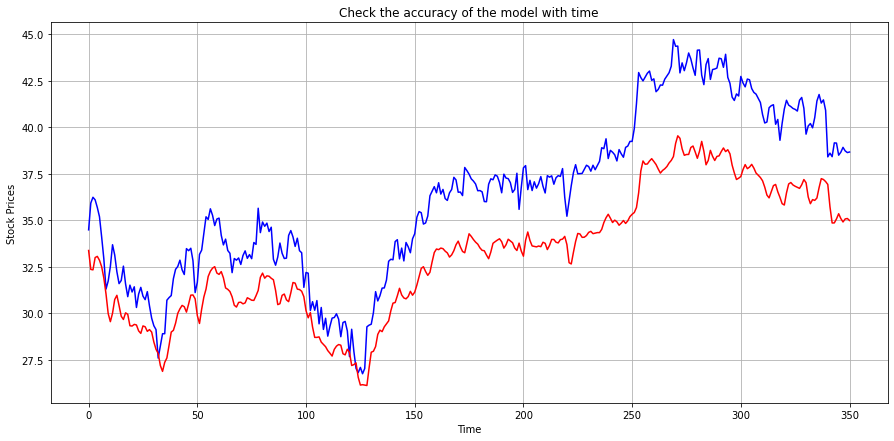

In [56]:
# Ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
# testY is the blue line
plt.plot(testY , 'b')
# pred is the red line
plt.plot(test_pred , 'r')
# Setting x axis as time
plt.xlabel('Time')
# Setting y axis as stock prices
plt.ylabel('Stock Prices')
# setting title 
plt.title('Check the accuracy of the model with time')
# enabling grids in graph 
plt.grid(True)
# it call the graph with labels, titles, lines
plt.show()

In [57]:
train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = scaler.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))


44/44 [==============================] - 0s 2ms/step
Display Accuracy Training Data


0.9301380427089049

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


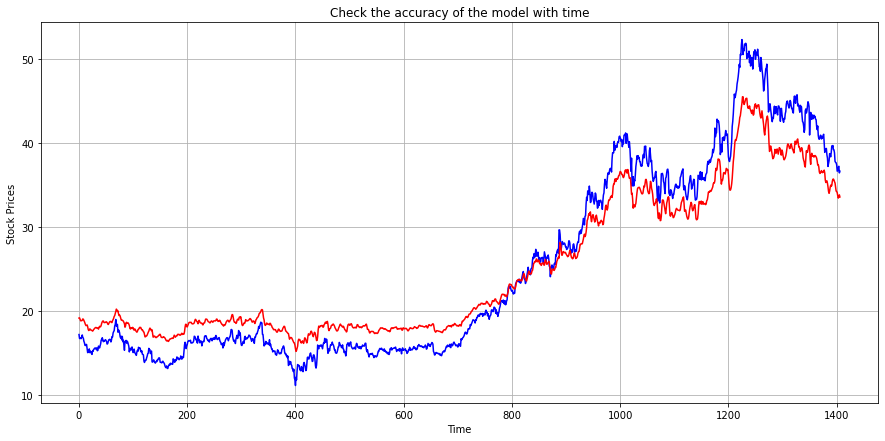

In [58]:
# Ploting the graph of stock prices with time - Training Data
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()



In [59]:
stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = scaler.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))


55/55 [==============================] - 0s 2ms/step
Display Accuracy Training Data


0.9258061533719253

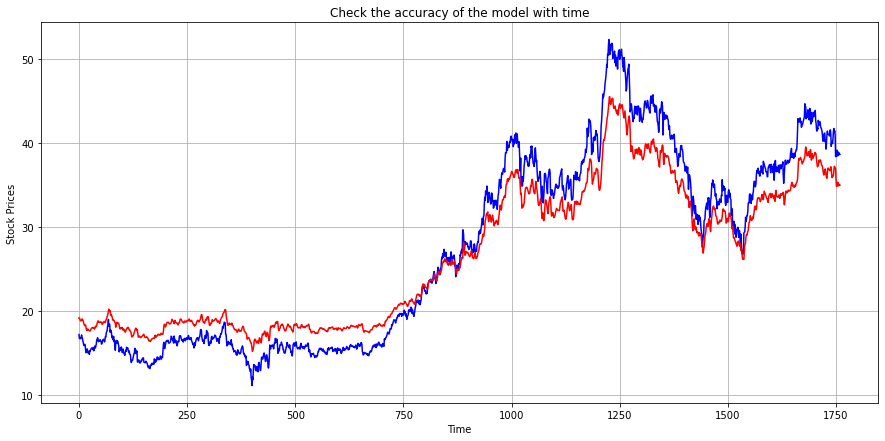

In [60]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(stocksY  , 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()


In [61]:
# Extract the data related to company - YHOO
results= df[df.symbol.isin (['YHOO'])]
# Update the data frame starting with 2nd records , since first prediction is for 2nd record
results= results [2:]
# Reset the index 0, 1,2 etc
results = results.reset_index(drop=True)
# Convert Predicted Value to Data Frame
df_stocks_pred= pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
# Concat Original and prediction data
results= pd.concat([results,df_stocks_pred],axis =1)
results.to_excel('results.xlsx')
display(results)


,date,symbol,open,close,low,high,volume,Close_Prediction
0,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0,19.139652
1,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0,19.163343
2,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0,18.975697
3,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0,18.813274
4,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0,18.827454
...,...,...,...,...,...,...,...,...
1755,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0,35.097511
1756,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0,34.912601
1757,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0,35.074814
1758,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0,35.099674


In [62]:
########################################################

In [63]:
#Modifications and new data

In [64]:
#######################################################

In [65]:
# imports

import numpy as np
import pandas as pd
#from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython import display
import seaborn as sns
%matplotlib inline

#import functions
import plotting

from datetime import datetime,date

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.metrics import mean_squared_error
#from keras.layers.recurrent import LSTM
from keras.layers import LSTM

# Needed to help our plots look cleaner with plotly 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)

In [66]:
# https://towardsdatascience.com/free-stock-data-for-python-using-yahoo-finance-api-9dafd96cad2e
# https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

# Install yfinance
!pip install yfinance

In [67]:
# Download stock data then export as CSV

import yfinance as yfin

#tickes are S&P 500, Apple, Microsoft, Amazon, Johnson & Johnson, Pfizer, Ford and Google
tickers = ("SPY", "AAPL", "MSFT", "AMZN", "JNJ", "PFE", "F", "GOOGL") 

start = "2001-01-01"
end = '2021-08-17'

fin_data = yfin.download(tickers, start, end) #download yahoo finance data for specific dates

fin_data.to_csv('fin_data.csv') #convert data to csv
#fin_data.to_csv('finance.csv') #convert data to csv

[*********************100%***********************]  8 of 8 completed


In [68]:
#check the dimensions of the data
fin_data.shape

(5188, 48)

In [69]:
#view the first 5 rows of the data
fin_data.head()

Adj Close                                                   \
                AAPL      AMZN          F GOOGL        JNJ       MSFT   
Date                                                                    
2001-01-02  0.226078  0.693750  12.081743   NaN  28.563028  13.530797   
2001-01-03  0.248876  0.878125  12.485504   NaN  27.652931  14.954063   
2001-01-04  0.259326  0.775000  13.386197   NaN  27.057890  15.110034   
2001-01-05  0.248876  0.728125  13.044556   NaN  27.407902  15.324509   
2001-01-08  0.251726  0.746875  12.733970   NaN  27.372917  15.266015   

                                     Close            ...       Open  \
                  PFE        SPY      AAPL      AMZN  ...        PFE   
Date                                                  ...              
2001-01-02  20.046938  85.301788  0.265625  0.693750  ...  43.228176   
2001-01-03  18.933226  89.399254  0.292411  0.878125  ...  43.643265   
2001-01-04  18.172630  88.436943  0.304688  0.775000  ...  41.627136   
2001-01-05  18.417114  85.550117  0.292411  0.728125  ...  40.322582   
2001-01-08  18.199797  86.212372  0.295759  0.746875  ...  40.796963   

                          Volume                                       \
                  SPY       AAPL       AMZN         F GOOGL       JNJ   
Date                                                                    
2001-01-02  132.00000  452312000  184070000   5226500   NaN   8855200   
2001-01-03  128.31250  817073600  293608000  11157800   NaN  11326000   
2001-01-04  134.93750  739396000  212410000  14896200   NaN  12941200   
2001-01-05  133.46875  412356000  175976000   6710900   NaN   9277200   
2001-01-08  129.87500  373699200  208894000   5900300   NaN   5520200   

                                           
                 MSFT       PFE       SPY  
Date                                       
2001-01-02   82413200  11231108   8737500  
2001-01-03  135962200  23756633  19431600  
2001-01-04  112397000  34849983   9219000  
2001-01-05   93414600  19097637  12911400  
2001-01-08   79817600  14593684   6625300  

[5 rows x 48 columns]

In [70]:
#view the last 5 values of the data
fin_data.tail()

Adj Close                                                 \
                  AAPL        AMZN          F       GOOGL         JNJ   
Date                                                                    
2021-08-10  144.328506  166.033997  12.526891  136.807007  166.031586   
2021-08-11  144.586227  164.605499  12.626599  136.279007  166.060257   
2021-08-12  147.589783  165.175003  12.599404  137.194000  167.397903   
2021-08-13  147.797958  164.698502  12.318412  137.727493  168.401154   
2021-08-16  149.800308  164.949493  12.200576  138.309494  169.920319   

                                                    Close              ...  \
                  MSFT        PFE         SPY        AAPL        AMZN  ...   
Date                                                                   ...   
2021-08-10  282.015106  45.847160  432.701630  145.600006  166.033997  ...   
2021-08-11  282.517212  44.058559  433.776825  145.860001  164.605499  ...   
2021-08-12  285.333038  44.943348  435.076843  148.889999  165.175003  ...   
2021-08-13  288.326080  46.123066  435.868591  149.100006  164.698502  ...   
2021-08-16  290.049011  46.532154  436.894958  151.119995  164.949493  ...   

                 Open                 Volume                                  \
                  PFE         SPY       AAPL      AMZN         F       GOOGL   
Date                                                                           
2021-08-10  46.200001  442.609985   69023100  48252000  32120800  19414000.0   
2021-08-11  47.779999  443.820007   48493500  58944000  42795600  15352000.0   
2021-08-12  46.500000  443.619995   72282600  46282000  38547900  16506000.0   
2021-08-13  47.410000  445.589996   59375000  41134000  45118500  15948000.0   
2021-08-16  48.230000  444.529999  103296000  66394000  38664300  22384000.0   

                                                   
                JNJ      MSFT       PFE       SPY  
Date                                               
2021-08-10  3678300  18616600  81189400  43339300  
2021-08-11  4221300  13955900  50878200  44034300  
2021-08-12  4300400  14561300  29676400  38909400  
2021-08-13  5882100  18249000  35379200  39470300  
2021-08-16  4782800  22507600  38045800  73740000  

[5 rows x 48 columns]

In [71]:
#check if there are missing values for each type of stock
fin_data.isnull().sum()

Adj Close  AAPL       0
           AMZN       0
           F          0
           GOOGL    910
           JNJ        0
           MSFT       0
           PFE        0
           SPY        0
Close      AAPL       0
           AMZN       0
           F          0
           GOOGL    910
           JNJ        0
           MSFT       0
           PFE        0
           SPY        0
High       AAPL       0
           AMZN       0
           F          0
           GOOGL    910
           JNJ        0
           MSFT       0
           PFE        0
           SPY        0
Low        AAPL       0
           AMZN       0
           F          0
           GOOGL    910
           JNJ        0
           MSFT       0
           PFE        0
           SPY        0
Open       AAPL       0
           AMZN       0
           F          0
           GOOGL    910
           JNJ        0
           MSFT       0
           PFE        0
           SPY        0
Volume     AAPL       0
           AMZN 

In [72]:
# handing missing values
fin_data.fillna(method='ffill', inplace = True) # use front fill method
fin_data.fillna(method='bfill', inplace = True) # use back fill method

In [73]:
#check to see if there are still any missing values
fin_data.isnull().sum()

Adj Close  AAPL     0
           AMZN     0
           F        0
           GOOGL    0
           JNJ      0
           MSFT     0
           PFE      0
           SPY      0
Close      AAPL     0
           AMZN     0
           F        0
           GOOGL    0
           JNJ      0
           MSFT     0
           PFE      0
           SPY      0
High       AAPL     0
           AMZN     0
           F        0
           GOOGL    0
           JNJ      0
           MSFT     0
           PFE      0
           SPY      0
Low        AAPL     0
           AMZN     0
           F        0
           GOOGL    0
           JNJ      0
           MSFT     0
           PFE      0
           SPY      0
Open       AAPL     0
           AMZN     0
           F        0
           GOOGL    0
           JNJ      0
           MSFT     0
           PFE      0
           SPY      0
Volume     AAPL     0
           AMZN     0
           F        0
           GOOGL    0
           JNJ      0
          

In [74]:
#view descriptive statistics of adjusted close process of the stocks
fin_data[['Adj Close']].describe()

Adj Close                                                      \
              AAPL         AMZN            F        GOOGL          JNJ   
count  5188.000000  5188.000000  5188.000000  5188.000000  5188.000000   
mean     21.709417    28.895866     7.587334    25.906021    66.367627   
std      30.194096    43.199287     2.579000    25.775237    37.466460   
min       0.199405     0.298500     0.774203     2.502753    23.390720   
25%       1.968590     2.182125     5.583786     8.554242    37.821092   
50%      10.505082     9.117500     7.891950    14.865115    45.749521   
75%      27.264167    36.005000     9.308992    38.405125    95.646366   
max     149.800308   186.570496    15.425802   138.309494   169.920319   

                                              
              MSFT          PFE          SPY  
count  5188.000000  5188.000000  5188.000000  
mean     49.372718    18.927386   146.831534  
std      56.054951     8.083619    85.064802  
min      11.376366     6.586056    51.957130  
25%      18.759450    12.485495    84.148077  
50%      22.298246    16.336124   107.038971  
75%      49.756845    24.717200   186.351425  
max     290.049011    46.532154   436.894958

In [75]:
# view general info
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5188 entries, 2001-01-02 to 2021-08-16
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   5188 non-null   float64
 1   (Adj Close, AMZN)   5188 non-null   float64
 2   (Adj Close, F)      5188 non-null   float64
 3   (Adj Close, GOOGL)  5188 non-null   float64
 4   (Adj Close, JNJ)    5188 non-null   float64
 5   (Adj Close, MSFT)   5188 non-null   float64
 6   (Adj Close, PFE)    5188 non-null   float64
 7   (Adj Close, SPY)    5188 non-null   float64
 8   (Close, AAPL)       5188 non-null   float64
 9   (Close, AMZN)       5188 non-null   float64
 10  (Close, F)          5188 non-null   float64
 11  (Close, GOOGL)      5188 non-null   float64
 12  (Close, JNJ)        5188 non-null   float64
 13  (Close, MSFT)       5188 non-null   float64
 14  (Close, PFE)        5188 non-null   float64
 15  (Close, SPY)        5188 non-null   f

In [76]:
# View the maximum close date of stocks
def max_close(stocks,df):
    """ This calculates and returns the maximum closing value of a specific stock"""
    return df['Close'][stocks].max() # computes and returns the maximum closing stock value

In [77]:
# test the above function with specific stocks
def test_max():
    """ This tests the max_close function"""
    for stocks in ["SPY", "AAPL", "MSFT", "AMZN", "JNJ", "PFE", "F", "GOOGL"]:
        print("Maxiumum Closing Value for {} is {}".format(stocks, max_close(stocks,fin_data)))

test_max()        
#if __name__ == "__main__" :
#    test_()

Maxiumum Closing Value for SPY is 446.9700012207031
Maxiumum Closing Value for AAPL is 151.1199951171875
Maxiumum Closing Value for MSFT is 294.6000061035156
Maxiumum Closing Value for AMZN is 186.57049560546875
Maxiumum Closing Value for JNJ is 177.83999633789062
Maxiumum Closing Value for PFE is 48.90999984741211
Maxiumum Closing Value for F is 30.709999084472656
Maxiumum Closing Value for GOOGL is 138.3094940185547


In [78]:
# calculate the mean volume for the stocks
def mean_vol(stocks,df):
    """ This calculates and returns the minimum volume of a specific stock"""
    return df['Volume'][stocks].mean() # computes and returns the minimum volume of a stock

In [79]:
# test the above function with specific stocks
def test_mean():
    """ This tests the max_close function"""
    for stocks in ["SPY", "AAPL", "MSFT", "AMZN", "JNJ", "PFE", "F", "GOOGL"]:
        print("Mean Volume for {} is {}".format(stocks, mean_vol(stocks,fin_data)))

test_mean() 

Mean Volume for SPY is 115524101.9853508
Mean Volume for AAPL is 433155843.7162683
Mean Volume for MSFT is 52421931.14880493
Mean Volume for AMZN is 125479954.12490362
Mean Volume for JNJ is 9222071.588280648
Mean Volume for PFE is 33343778.725134928
Mean Volume for F is 41955511.25674634
Mean Volume for GOOGL is 265783347.95605242


In [80]:
#Plotting stock prices

In [81]:
# Plot function for the Adjusted closing value
def plot_adj(df,title,stocks,y=0):
        ax = df['Adj Close'][stocks].plot(title=title, figsize=(16,8), ax=None)
        ax.set_xlabel("Date")
        ax.set_ylabel("Stock Price")
        ax.axhline(y=y,color='black')
        ax.legend(stocks, loc='upper left')
        plt.show()

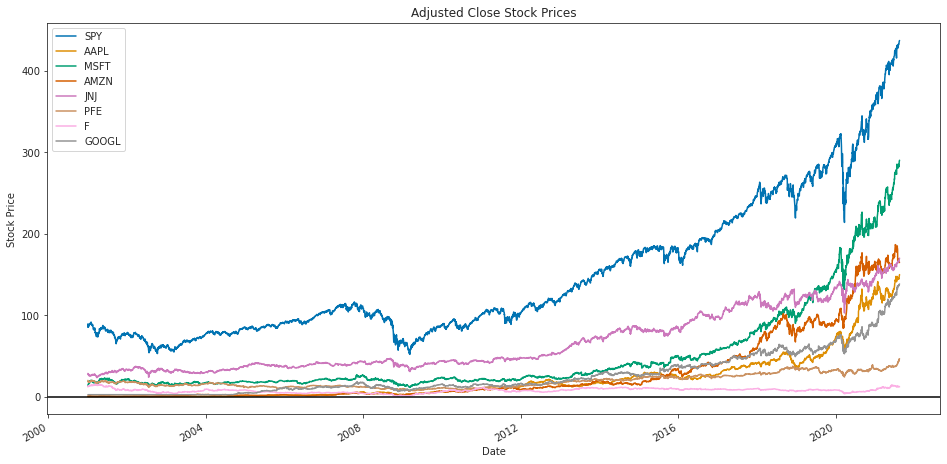

In [82]:
# View the plot of Adjusted close
stocks = ["SPY", "AAPL", "MSFT", "AMZN", "JNJ", "PFE", "F", "GOOGL"]
plot_adj(fin_data,"Adjusted Close Stock Prices",stocks)

In [83]:
#From the plot above, we can see that Amazon and Google has the highest growth. 
#This could be as a result of the increase in useage of these companies world wide, but let us normalize the data before we make that conclusion. 
#I will explore more features in the dataset before normalizing it.

In [84]:
# Plot function for the High prices
def plot_high(df,title,stocks,y=0):
        ax = df['High'][stocks].plot(title=title, figsize=(16,8), ax = None)
        ax.set_xlabel("Date")
        ax.set_ylabel("Stock Price")
        ax.axhline(y=y,color='black')
        ax.legend(stocks, loc='upper left')
        plt.show()

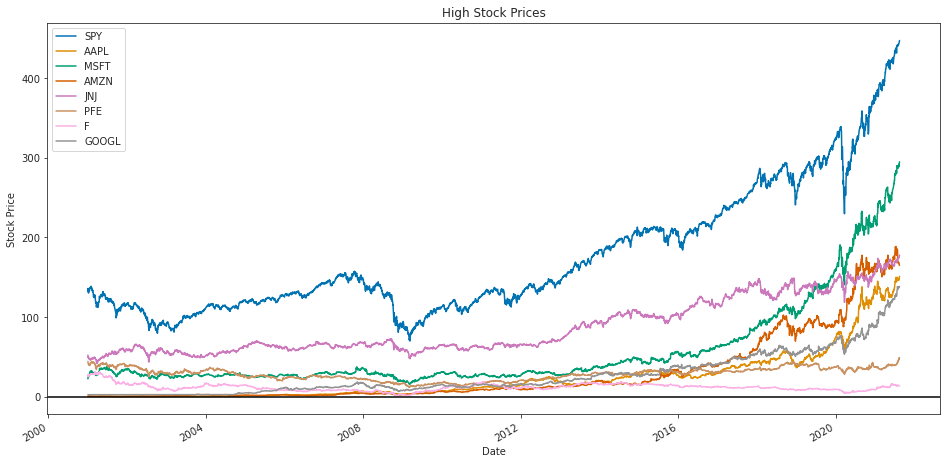

In [85]:
# View the plot of high stock prices
stocks = ["SPY", "AAPL", "MSFT", "AMZN", "JNJ", "PFE", "F", "GOOGL"]
title = "High Stock Prices"
plot_high(fin_data,title,stocks)

In [86]:
#view only google Adjusted close price
fin_data['Adj Close']['GOOGL']

Date
2001-01-02      2.511011
2001-01-03      2.511011
2001-01-04      2.511011
2001-01-05      2.511011
2001-01-08      2.511011
                 ...    
2021-08-10    136.807007
2021-08-11    136.279007
2021-08-12    137.194000
2021-08-13    137.727493
2021-08-16    138.309494
Name: GOOGL, Length: 5188, dtype: float64

In [87]:
# view only google and amazon Adjusted close price
fin_data['Adj Close'][['GOOGL', 'AMZN']]

,GOOGL,AMZN
Date,,
2001-01-02,2.511011,0.693750
2001-01-03,2.511011,0.878125
2001-01-04,2.511011,0.775000
2001-01-05,2.511011,0.728125
2001-01-08,2.511011,0.746875
...,...,...
2021-08-10,136.807007,166.033997
2021-08-11,136.279007,164.605499
2021-08-12,137.194000,165.175003


In [88]:
# view all stocks adjusted close prices for amazon and google from Jan 2010 to Aug 2021
fin_data['Adj Close'].loc['2010-01-01':'2021-08-17', ['AMZN', 'GOOGL']]

,AMZN,GOOGL
Date,,
2010-01-04,6.695000,15.684434
2010-01-05,6.734500,15.615365
2010-01-06,6.612500,15.221722
2010-01-07,6.500000,14.867367
2010-01-08,6.676000,15.065566
...,...,...
2021-08-10,166.033997,136.807007
2021-08-11,164.605499,136.279007
2021-08-12,165.175003,137.194000


In [89]:
# view all stocks adjusted close price from Jan 2010 to Aug 2021
fin_data['Adj Close'].loc['2010-01-01':'2021-08-17']

,AAPL,AMZN,F,GOOGL,JNJ,MSFT,PFE,SPY
Date,,,,,,,,
2010-01-04,6.505280,6.695000,6.316513,15.684434,43.962318,23.623901,11.026819,88.454193
2010-01-05,6.516527,6.734500,6.734339,15.615365,43.452568,23.631529,10.869544,88.688347
2010-01-06,6.412873,6.612500,6.986259,15.221722,43.805992,23.486513,10.834594,88.750786
2010-01-07,6.401018,6.500000,7.164449,14.867367,43.493343,23.242256,10.793817,89.125435
2010-01-08,6.443575,6.676000,7.182884,15.065566,43.642868,23.402538,10.881191,89.422020
...,...,...,...,...,...,...,...,...
2021-08-10,144.328506,166.033997,12.526891,136.807007,166.031586,282.015106,45.847160,432.701630
2021-08-11,144.586227,164.605499,12.626599,136.279007,166.060257,282.517212,44.058559,433.776825
2021-08-12,147.589783,165.175003,12.599404,137.194000,167.397903,285.333038,44.943348,435.076843


In [90]:
# create function to plot data
def plot_data1(df,stocks,title,ylabel='Stock Price',y=0):
    """This funtion plots stock prices"""
    ax = df.plot(title=title, figsize=(16,8), ax=None, fontsize=2)
    ax.set_xlabel("Date")
    ax.set_label(ylabel)
    ax.axhline(y=y,color='black')
    ax.legend(stocks, loc='upper left')
    plt.show()

In [91]:
# create function to plot selected stocks
def selected_plot(df, columns,stocks, start_idx, end_idx):
    """This function plots specific stocks over a given date range"""
    plot_data1(df[columns].loc[start_idx:end_idx, stocks],stocks, title="Plot for selected Stocks")

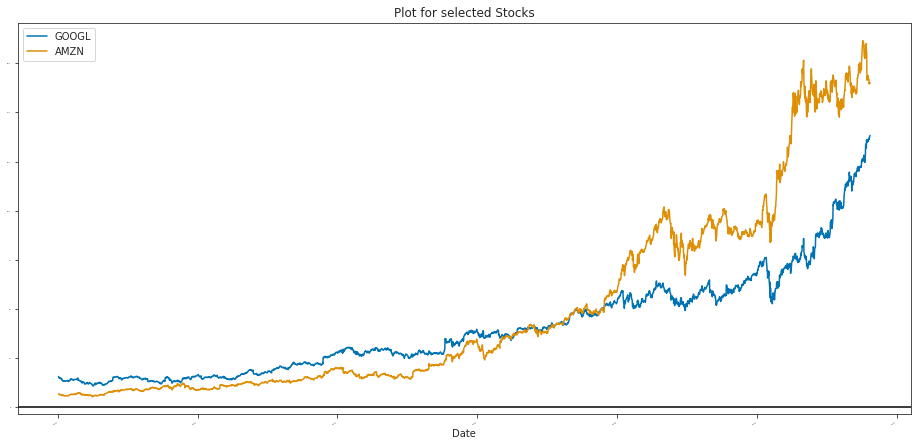

In [92]:
# create function to plot data based on specific columns, symbols, and date ranges
def test_select():
    """This function plots stock data based on specific columns, symbols, and date ranges """
    # specify columns to plot and stock symbols
    columns = 'Adj Close'
    stocks = ['GOOGL', 'AMZN']  
        
    # Get stock data
    df = fin_data

    # Slice and plot
    selected_plot(df, columns, stocks, '2010-01-01', '2021-08-17')
    
test_select()  # run the plot function  

In [93]:
#Normalizing the data
#We want to know how the different types of stocks went up and down with respect to the others. 
#In order to do this, we will normalize the data. We do this by dividing the values of each column 
#by day one to ensure that each stock starts with $1 .

In [94]:
def plot_data2(df,stocks,title='Stock Prices',ylabel="Stock Price",y=0, start='2001-01-01', end ='2021-08-17'):
    
    """ This function creates a plot of adjusted close stock prices
    inputs:
    df - dataframe
    title - plot title
    stocks - the stock symbols of each company
    ylabel - y axis label
    y - horizontal line(integer)
    output: the plot of adjusted close stock prices
    """
    df_new = df[start:end]
    #ax = df_new['Adj Close'][stocks].plot(title=title, figsize=(16,8), ax = None)
    ax = df_new.plot(title=title, figsize=(16,8), ax = None)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    ax.axhline(y=y,color='black')
    ax.legend(stocks, loc='upper left')
    plt.show()

In [95]:
# create function that normalizes the data
def normalize_data(df):
    """ 
    This function normalizes the stock prices using the first row of the dataframe
    input - stock data
    output - normalized stock data
    """
    return df/df.iloc[0,:] 

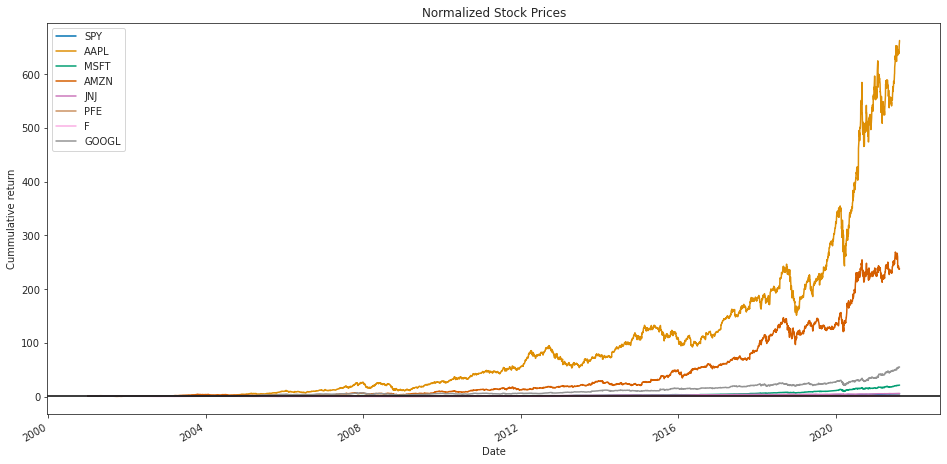

In [96]:
# plot the data with the new normalized data

stocks = ["SPY", "AAPL", "MSFT", "AMZN", "JNJ", "PFE", "F", "GOOGL"]

plot_data2(normalize_data(fin_data['Adj Close'][stocks]),stocks,title = "Normalized Stock Prices", ylabel = 'Cummulative return',y=1)

In [97]:
#From the above cummulative return plot, we can see that Apple has the highest return over the years, while Amazon was second and Google third and Microsoft fourth. The growth of Google and Microsoft looks much more stable than Apple and Amazon. Looking at the plot, Apple has alot of volatility and risky stocks especially in recent years.

In [98]:
#Cumulative Return
#Let's have a look at how the pandemic affected stock prices for these companies.

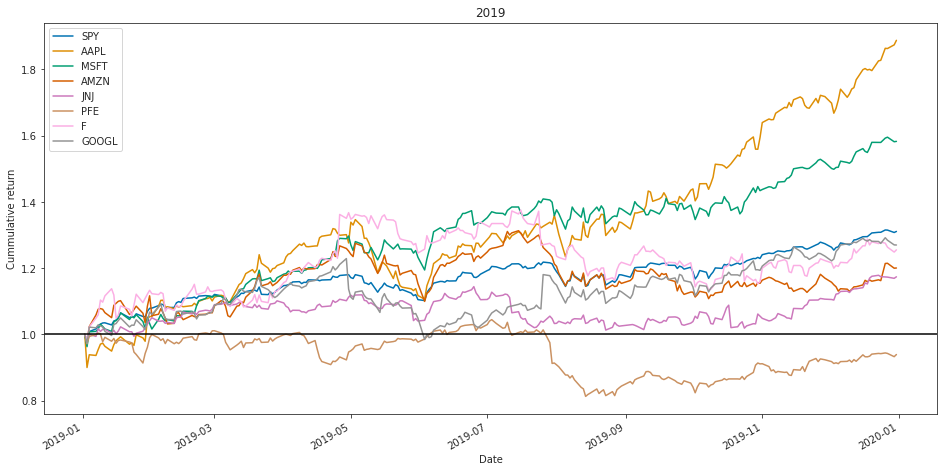

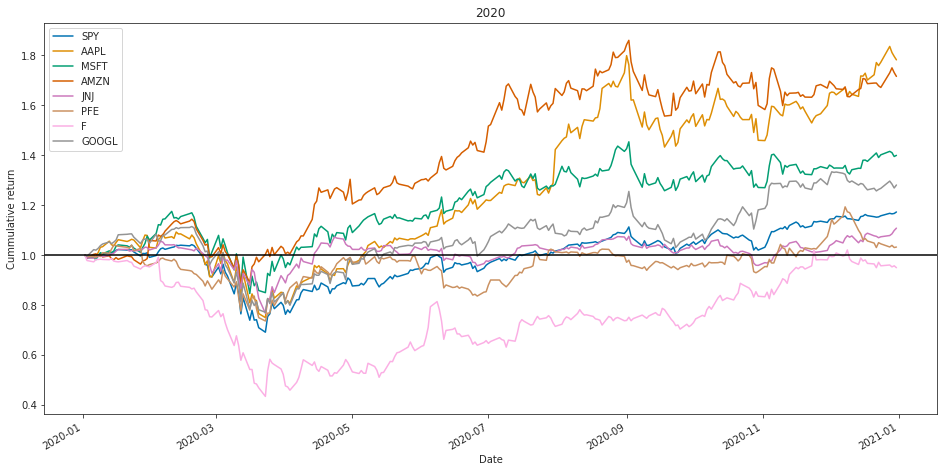

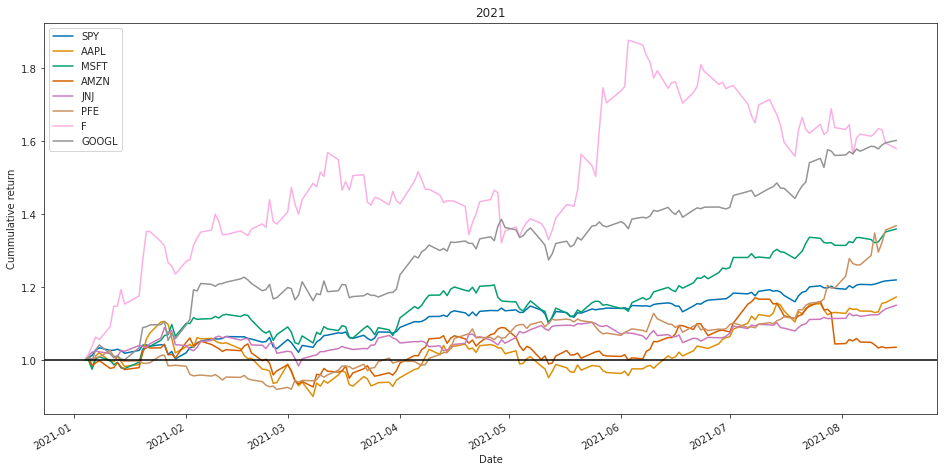

In [99]:
stocks = ["SPY", "AAPL", "MSFT", "AMZN", "JNJ", "PFE", "F", "GOOGL"]

plot_data2(normalize_data(fin_data['Adj Close'][stocks]['2019-01-01':'2019-12-31']), stocks,title = '2019', ylabel = 'Cummulative return',y=1, start='2019-01-01', end = '2019-12-31') #2019
plot_data2(normalize_data(fin_data['Adj Close'][stocks]['2020-01-01':'2020-12-31']), stocks,title = '2020', ylabel = 'Cummulative return',y=1, start='2020-01-01', end = '2020-12-31') #2020
plot_data2(normalize_data(fin_data['Adj Close'][stocks]['2021-01-01':'2021-08-17']), stocks,title = '2021', ylabel = 'Cummulative return',y=1, start='2021-01-01', end = '2021-08-17') #2021


In [100]:
#Computing the Rolling mean and Bollinger Bands

In [101]:
#The rolling mean may give us some idea about the true underlying prices of a stock. If there is a significant deviation below or above the rolling mean, it may give us an idea about a potential buying and selling opportunity respectively.

In [102]:
# Bollinger observed that looking at the recent volatility of the stock, if it is very volatile, we might discard the movement above and below the mean. But if it is not very volatile we may want to pay attention to it.

In [103]:
# compute rolling mean, rolling standard deviation, upper and lower bands

def rolling_stats(df, stocks, type_, window = 20):
    """
    This function computes the rolling mean and Bollinger bands
    inputs : 
    df - dataframe
    stocks - the type of stocks we would be analyzing
    type_ - the price type of the rolling calculation
    window - number of days used to calculate the statistics
    output: 
    rolling mean, rolling standard deviation, upper and lower bands of 2 std each
    """
    
    val = df[(type_,stocks)]
    rolling_mean = df[(type_, stocks)].rolling(window=window).mean()
    rolling_std = df[(type_, stocks)].rolling(window=window).std()
    upper_band = rolling_mean + rolling_std*2
    lower_band = rolling_mean - rolling_std*2
    
    return val, rolling_mean, rolling_std, upper_band, lower_band

In [104]:
# plot the rolling mean, rolling standard deviation, upper and lower bands

def rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean'):
    """
    This function plots the rolling mean and Bollinger bands
    inputs : 
    stocks - the type of stocks we would be analyzing
    val - value of the stock price type
    rolling_mean - rolling mean
    upper_band - stocks upper band
    lower_band - stocks lower band
    title - plot title
    output: 
    plot of rolling mean, rolling standard deviation, upper and lower bands of 2 std each
    """
    
    ax = rolling_mean.plot(title=title, figsize=(16,8), label='Rolling Mean')
    plt.plot(upper_band, label = 'Upper Band')
    plt.plot(lower_band, label = 'Lower Band')
    plt.plot(val, label = 'Value of Stock')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left')
    plt.show()
    
    return ax

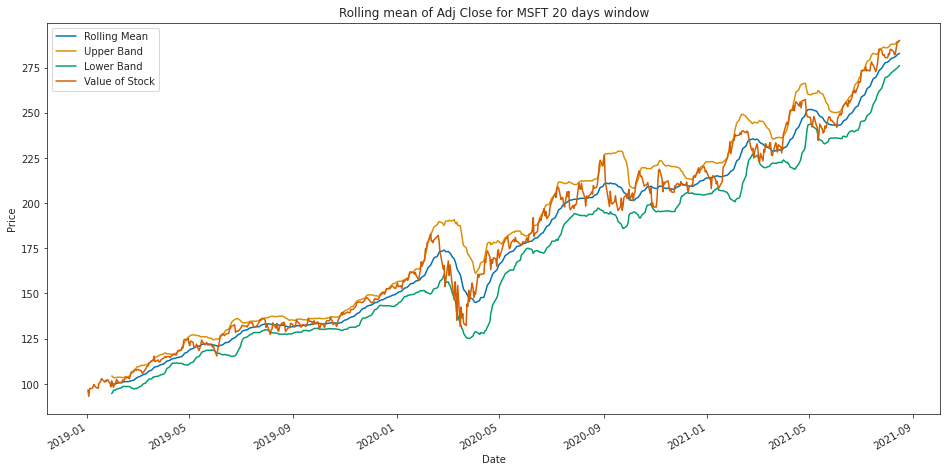

In [105]:
stocks = 'MSFT'
type_ = 'Adj Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(fin_data['2019-01-01':'2021-08-17'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean of {} for {} 20 days window'.format(type_,stocks))
plt.show()

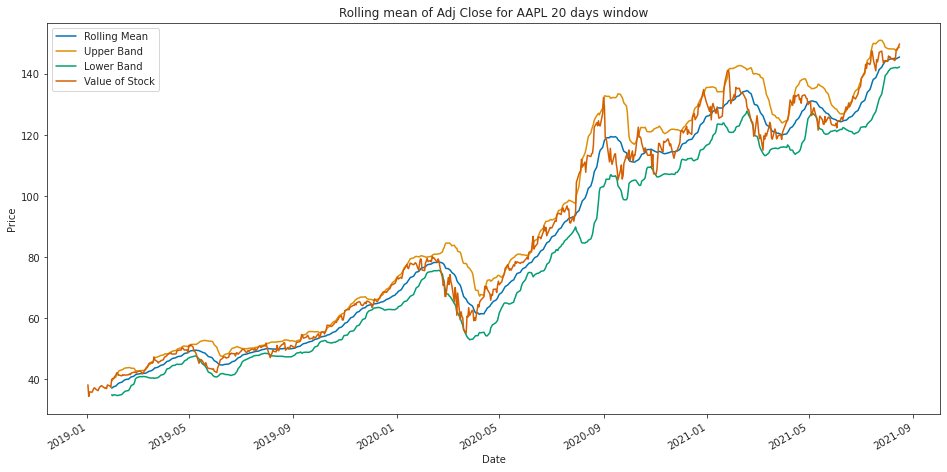

In [106]:
# view rolling statistics for Apple
stocks = 'AAPL'
type_ = 'Adj Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(fin_data['2019-01-01':'2021-08-17'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean of {} for {} 20 days window'.format(type_,stocks))
plt.show()

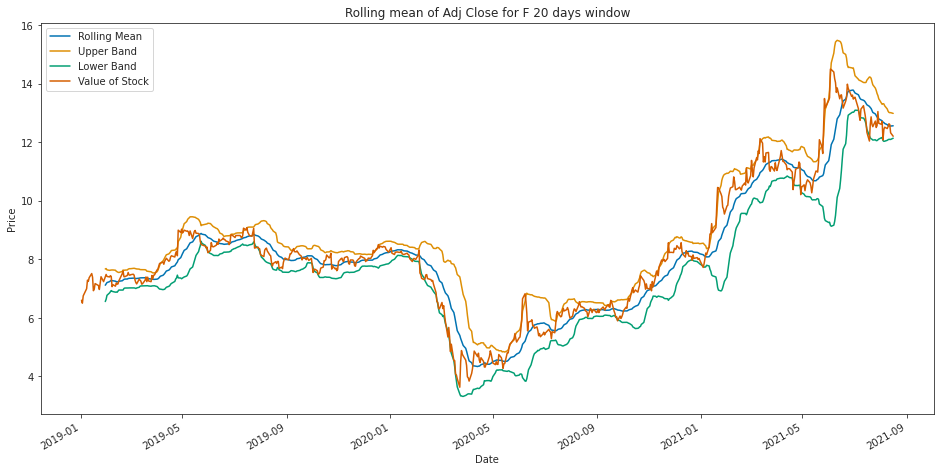

In [107]:
# view rolling statistics for Ford
stocks = 'F'
type_ = 'Adj Close'

val, rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(fin_data['2019-01-01':'2021-08-17'], stocks, type_)

rolling_plot(stocks, val, rolling_mean, upper_band, lower_band, title='Rolling mean of {} for {} 20 days window'.format(type_,stocks))
plt.show()

In [108]:
#Computing Daily Returns
#Daily returns tells us how much the stock price go up and down on a particular day. 

In [109]:
def daily_returns_cal(df,stocks):
    """
    This function computes and returns the daily return values
    input: df (dataframe) and stocks
    output: daily return values
    """
    
    daily_returns = (df[('Adj Close', stocks)][1:]/df[('Adj Close', stocks)][:-1].values) - 1
       
    return daily_returns

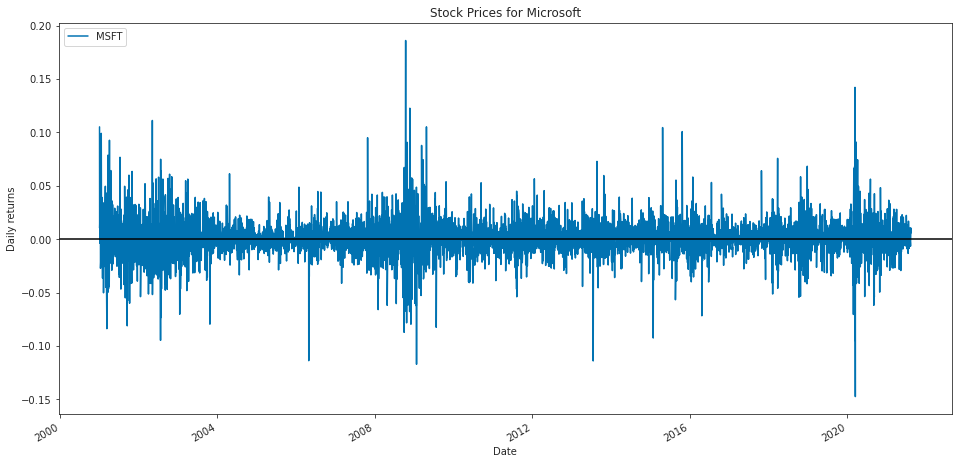

In [110]:
# Daily return of Microsoft
plot_data2(daily_returns_cal(fin_data,'MSFT'),stocks=['MSFT'], ylabel = 'Daily returns',title='Stock Prices for Microsoft',y=0)


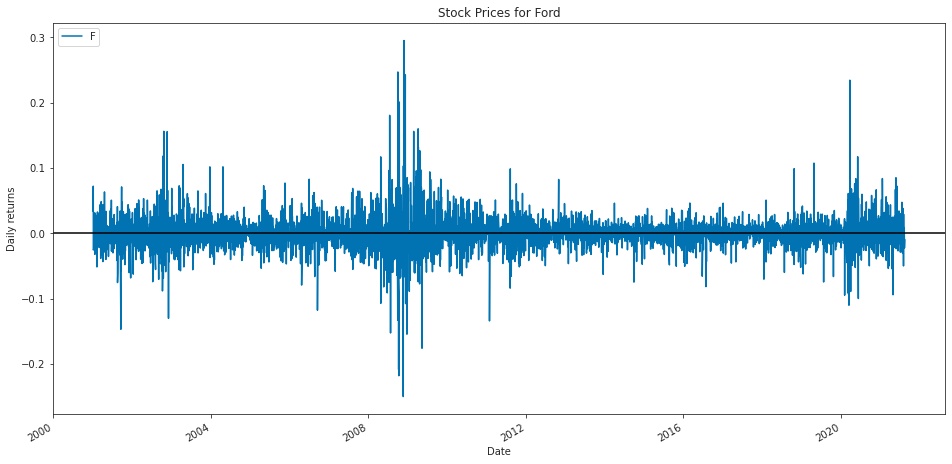

In [111]:
# Daily return of Ford
plot_data2(daily_returns_cal(fin_data,'F'),stocks=['F'], ylabel = 'Daily returns',title='Stock Prices for Ford',y=0)

In [112]:
#3. Modelling
#In this section I will be trying out some models to predict the Adjusted closing price of a stock.

In [113]:
#Predicting Adjusted close value of Microsoft stocks

In [114]:
# Function that get specific stock data and fills in any missing value
def get_data(df, stocks):
    """
    This function gets a specific stock data and fills in any missing values using the fill forward and fill backward methods
    Input: 
    df - dataframe
    stocks - the type of stock
    Output - a cleaned dataset to be used for prediction
    """
    df1 = pd.DataFrame (data = df.iloc[:, df.columns.get_level_values(1)==stocks].values,
                          index = df.iloc[:, df.columns.get_level_values(1)==stocks].index,
                          columns = df.iloc[:, df.columns.get_level_values(1)==stocks].columns.get_level_values(0))
    
    df1.fillna(method='ffill', inplace= True)
    df1.fillna(method='bfill', inplace=True)
    
    return df1

In [115]:
# get Microsoft data and view the first 5 rows
msft_data = get_data(fin_data, 'MSFT')  
msft_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2001-01-02,13.530797,21.68750,22.5000,21.43750,22.06250,82413200.0
2001-01-03,14.954063,23.96875,24.4375,21.56250,21.59375,135962200.0
2001-01-04,15.110034,24.21875,25.2500,23.43750,23.90625,112397000.0
2001-01-05,15.324509,24.56250,24.9375,23.78125,24.25000,93414600.0
2001-01-08,15.266015,24.46875,24.8750,23.34375,24.46875,79817600.0


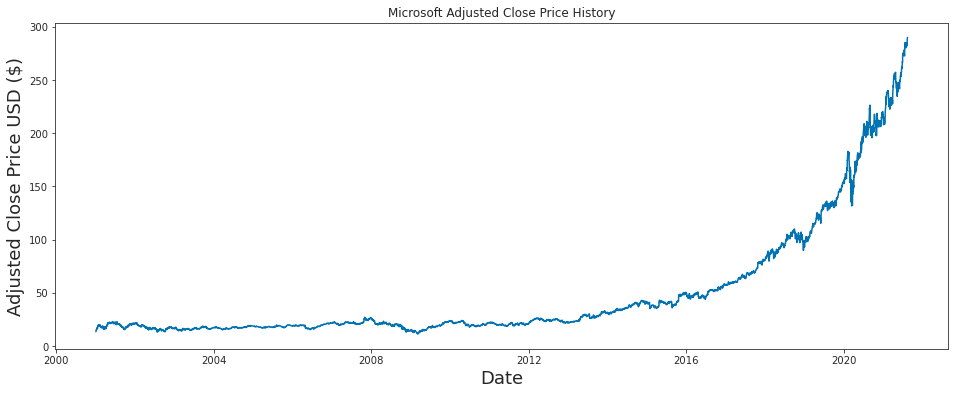

In [116]:
# plot showing Microsoft historical Adjusted closing prices
plt.figure(figsize=(16,6))
plt.title('Microsoft Adjusted Close Price History')
plt.plot(msft_data['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adjusted Close Price USD ($)', fontsize=18)
plt.show()

In [117]:
#Predicting using Long Short-Term Memory (LSTM)
#LSTM is an artificial recurrent neural network (RNN) architecture used in deep learning that is capable of learning long-term dependencies. It processes data passing on information as it propagates forward and have a chain like structure.

In [118]:
#view the shape
msft_data.shape

(5188, 6)

In [119]:
# create the variables for prediction and split into training and test sets

y = np.log(msft_data['Adj Close'].astype(int)) # we want to predict the adjusted close price
X = msft_data.drop('Adj Close', axis=1) # predictive variables (removing Adj close from it)

#split the data into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

In [120]:
# Build the LSTM model for Microsoft stock
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [121]:
# view model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [122]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [123]:
#Initial parameters used for LSTM

In [124]:
# Train the model - part 1
model.fit(np.array(xtrain).reshape(-1,5,1), ytrain, batch_size =1, epochs=5, verbose=0)

In [125]:
#predictions 
predictions = model.predict(np.array(xtest).reshape(-1,5,1))

33/33 [==============================] - 1s 2ms/step


In [126]:
#calculation of the mean absolute error
mean_abs_error3 = mean_absolute_error(ytest, predictions)
mean_abs_error3

0.07112822184434303

In [127]:
# Train the model - part 2
model.fit(np.array(xtrain).reshape(-1,5,1), ytrain, batch_size =100, epochs=10, verbose=0)

In [128]:
#predictions 2
predictions = model.predict(np.array(xtest).reshape(-1,5,1))

33/33 [==============================] - 0s 3ms/step


In [129]:
#calculation of the mean absolute error 2
mean_abs_error3 = mean_absolute_error(ytest, predictions)
mean_abs_error3

0.060608327399707076

In [130]:
#LSTM Refinement
#Final Parameters used to tune LSTM

In [131]:
# Build the LSTM model with the relu activation function
model2 = Sequential()
model2.add(LSTM(128, activation='relu', return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model2.add(LSTM(64, activation='relu', return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

In [132]:
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

In [133]:
# view model2 summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Train the model - part 3
model2.fit(np.array(xtrain).reshape(-1,5,1), ytrain, batch_size =1, epochs=5, verbose=0)

In [135]:
#predictions 3
predictions2 = model2.predict(np.array(xtest).reshape(-1,5,1))

33/33 [==============================] - 0s 1ms/step


In [136]:
#calculation of the mean absolute error 2
mean_abs_error2 = mean_absolute_error(ytest, predictions)
mean_abs_error2

0.060608327399707076

In [137]:
# Train the model - part 4 (increasing no. of epochs and batch_size)
model2.fit(np.array(xtrain).reshape(-1,5,1), ytrain, batch_size =100, epochs=10, verbose=0)

In [138]:
#predictions 3
predictions2 = model2.predict(np.array(xtest).reshape(-1,5,1))

33/33 [==============================] - 0s 2ms/step


In [139]:
#calculation of the mean absolute error 2
mean_abs_error2 = mean_absolute_error(ytest, predictions)
mean_abs_error2

0.060608327399707076

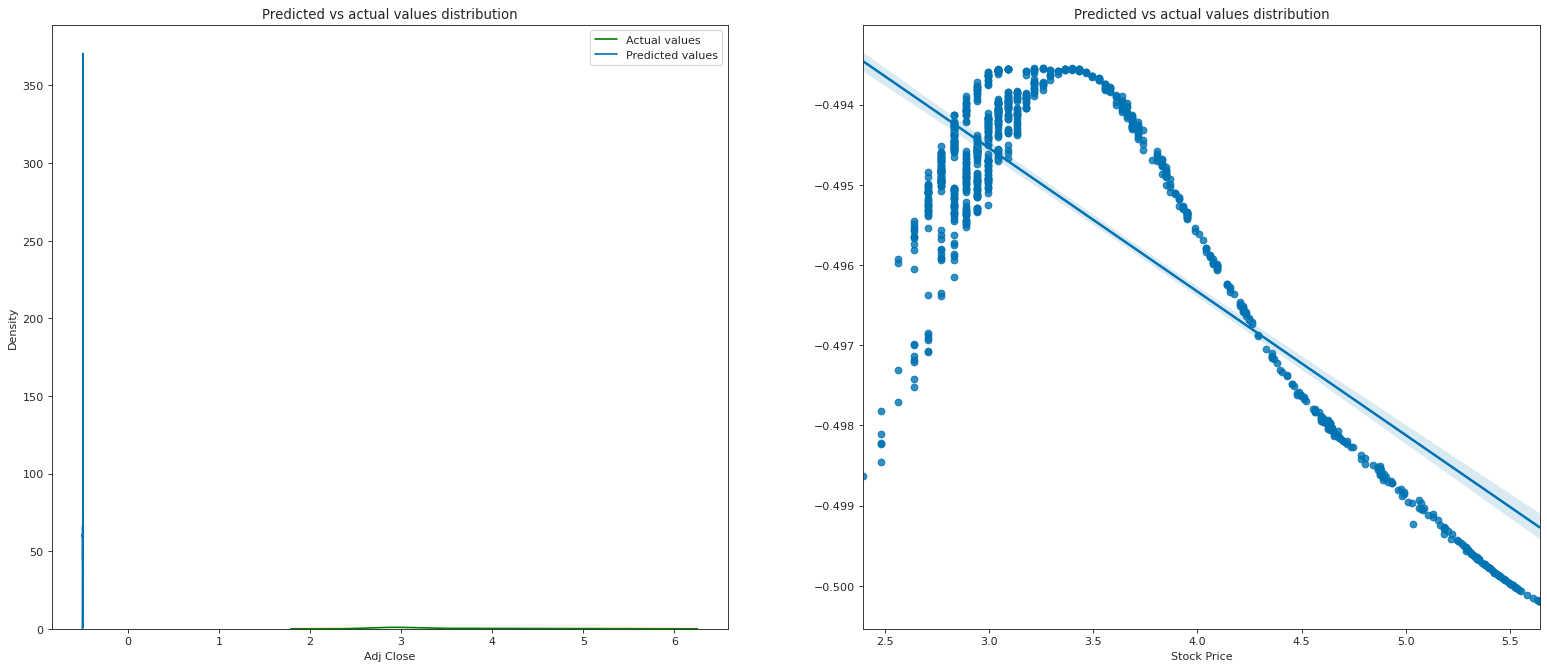

Mean absolute error of <keras.engine.sequential.Sequential object at 0x000001570C4578E0>: 0.060608327399707076


In [140]:
#plot showing the prediction and actual values
# import seaborn as sns

# import matplotlib.pyplot as plt
# import numpy as np



fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=ytest, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predictions2, color="b", label='Predicted values', ax=ax1)
# import warnings 
# warnings.filterwarnings("ignore")
sns.regplot(x=ytest, y=predictions2)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
#plt.legend()
ax1.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model,mean_abs_error3))
    


In [141]:
# Train the model part 5 (no activation function)
model.fit(np.array(xtrain).reshape(-1,5,1), ytrain, batch_size =800, epochs=50, verbose=0)

In [142]:
#predictions 
predictions = model.predict(np.array(xtest).reshape(-1,5,1))

33/33 [==============================] - 0s 2ms/step


In [143]:
#calculation of the mean absolute error
mean_abs_error3 = mean_absolute_error(ytest, predictions)
mean_abs_error3

0.05945319797194758

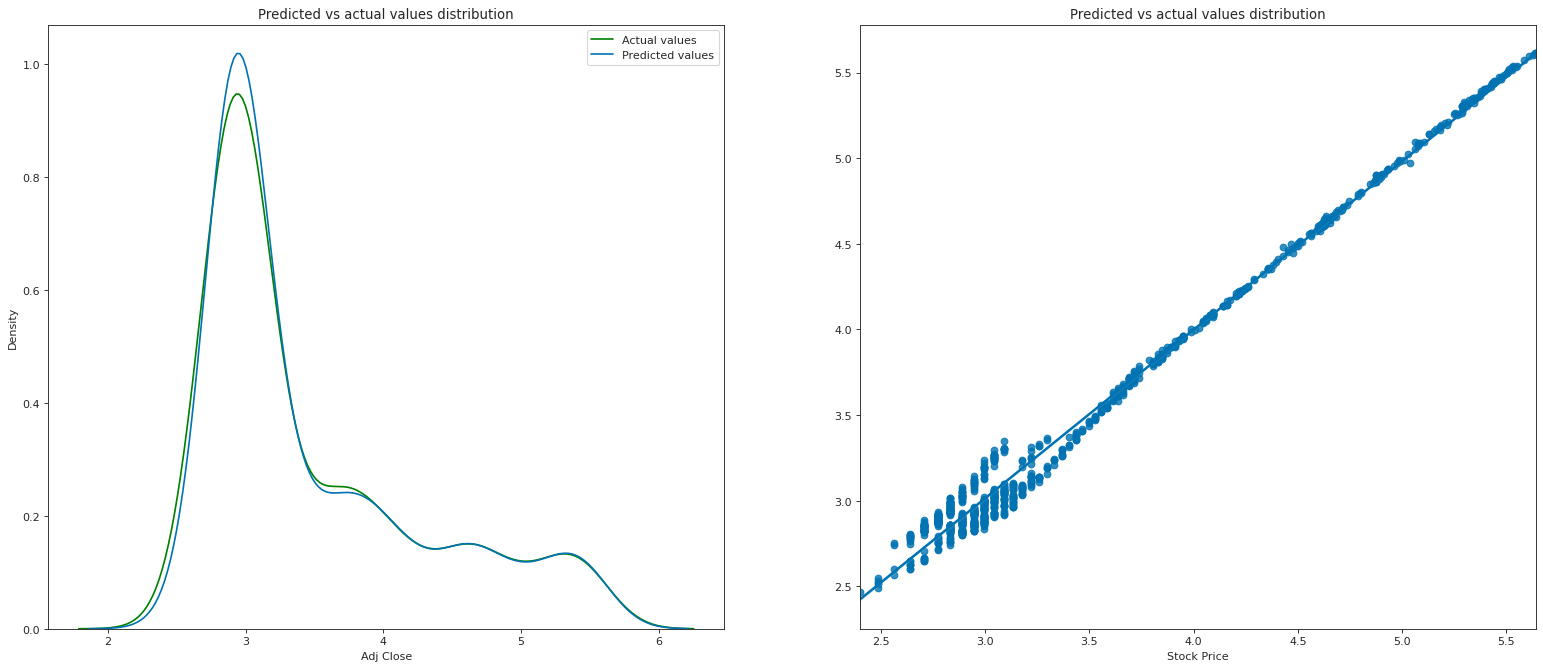

Mean absolute error of <keras.engine.sequential.Sequential object at 0x000001570C4578E0>: 0.05945319797194758


In [144]:
#plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=ytest, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predictions, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=ytest, y=predictions)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
#plt.legend()
ax1.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model,mean_abs_error3))

In [145]:
#From the above, we can see that the model is trained and evaluated using LSTM. The predicted and actual adjustable stock prices plots look are relatively similar with a mean absolute error of 0.0598 which isn't bad. However, there is still room for improvement and trying out other models to compare.

In [146]:
#Predicting using Linear Regression

In [147]:
#view the shape
msft_data.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-08-10,282.015106,286.440002,289.250000,285.200012,288.799988,18616600.0
2021-08-11,282.517212,286.950012,288.660004,285.859985,287.209991,13955900.0
2021-08-12,285.333038,289.809998,289.970001,286.339996,286.630005,14561300.0
2021-08-13,288.326080,292.850006,292.899994,289.299988,289.480011,18249000.0
2021-08-16,290.049011,294.600006,294.820007,290.019989,293.190002,22507600.0


In [148]:
# Building the model for Adj close prediction

y = np.log(msft_data['Adj Close'].astype(int)) # we want to predict the adjusted close price
X = msft_data.drop('Adj Close', axis=1) # predictive variables (removing Adj close from it)

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (4150, 5)
y_train (4150,)
x_test (1038, 5)
y_test (1038,)


In [149]:
#creating an instance of a Linear Regressor 
model_lin = LinearRegression()

#fit the model
model_lin.fit(X_train,y_train)

LinearRegression()

In [150]:
# check the score, coef_ and intercept_ of the model
model_lin.score(X_train,y_train)
model_lin.coef_
model_lin.intercept_

print('The score of the model is {}, the coeficients  are {} and the intercept is {}'.format(model_lin.score(X_train,y_train),model_lin.coef_,model_lin.intercept_))


The score of the model is 0.8942869781519508, the coeficients  are [ 1.59525731e-02  2.35848698e-02 -4.82615004e-02  2.06070880e-02
 -5.09736344e-09] and the intercept is 3.0437897299251775


In [151]:
#prediction
predict = model_lin.predict(X_test)
predict #view some predictions

array([3.3888125 , 4.70696245, 3.30758597, ..., 3.96038581, 3.46671397,
       3.44343996])

In [152]:
#calculation of the mean absolute error
mean_abs_error = mean_absolute_error(y_test, predict)
mean_abs_error

0.21595574872729037

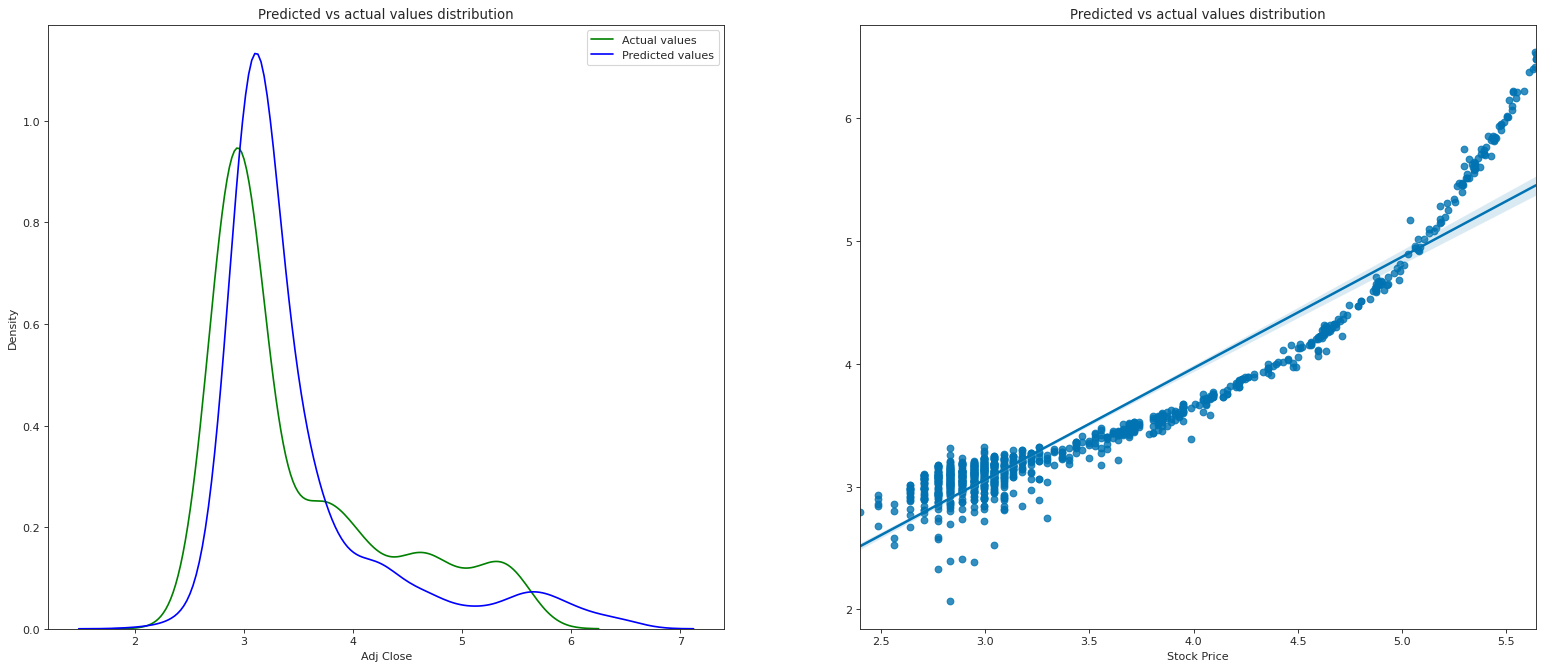

Mean absolute error of LinearRegression(): 0.21595574872729037


In [153]:
#plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predict, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=y_test, y=predict)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
#plt.legend()
ax1.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model_lin,mean_abs_error))

In [154]:
#From the above, we can see that the model is trained and evaluated using LinearRegression. The predicted and actual adjustable stock prices plots have variations but with a mean absolute error is 0.216 which abit worst than the LSTM model. However, there is still room for improvement and trying out other models to compare. Let't try out another model and see how it performs.

#Predicting using Random Forest Regressor

In [155]:
# Building the model for Adj close prediction

y = np.log(msft_data['Adj Close'].astype(int)) # we want to predict the adjusted close price
X = msft_data.drop('Adj Close', axis=1) # predictive variables (removing Adj close from it)

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (4150, 5)
y_train (4150,)
x_test (1038, 5)
y_test (1038,)


In [156]:
#creating an instance of a Random Forest Regressor 
model_rf = RandomForestRegressor(n_estimators=100, random_state=47)

In [157]:
#fit the model with the training data
model_rf.fit(X_train,y_train)

RandomForestRegressor(random_state=47)

In [158]:
#prediction
predict = model_rf.predict(X_test)
predict #view some predictions

array([3.50188109, 4.87565302, 3.57225059, ..., 4.35811012, 3.70171961,
       3.69702802])

In [159]:
#calculation of the mean absolute error
mean_abs_error = mean_absolute_error(y_test, predict)
mean_abs_error

0.04991581612908451

In [160]:
# view predictions and actual values
#print(np.c_[y_test,predict])
display_ = pd.DataFrame({'Actual value': y_test, 'Predicted value':predict})
display_.head(10)
#print(y_test,predict)

,Actual value,Predicted value
Date,,
2014-05-16,3.526361,3.501881
2019-07-31,4.875197,4.875653
2015-02-03,3.583519,3.572251
2002-11-20,2.833213,2.867008
2008-02-14,2.995732,2.977114
2010-03-04,3.044522,3.050846
2015-09-09,3.637586,3.626870
2021-07-28,5.638355,5.642563
2009-09-25,2.944439,2.909614


In [161]:
#From the table, we can see that the RandomForestRegressor performed very well and the actual and predicted Adjusted close value are fairly close. Let us now view the plots.

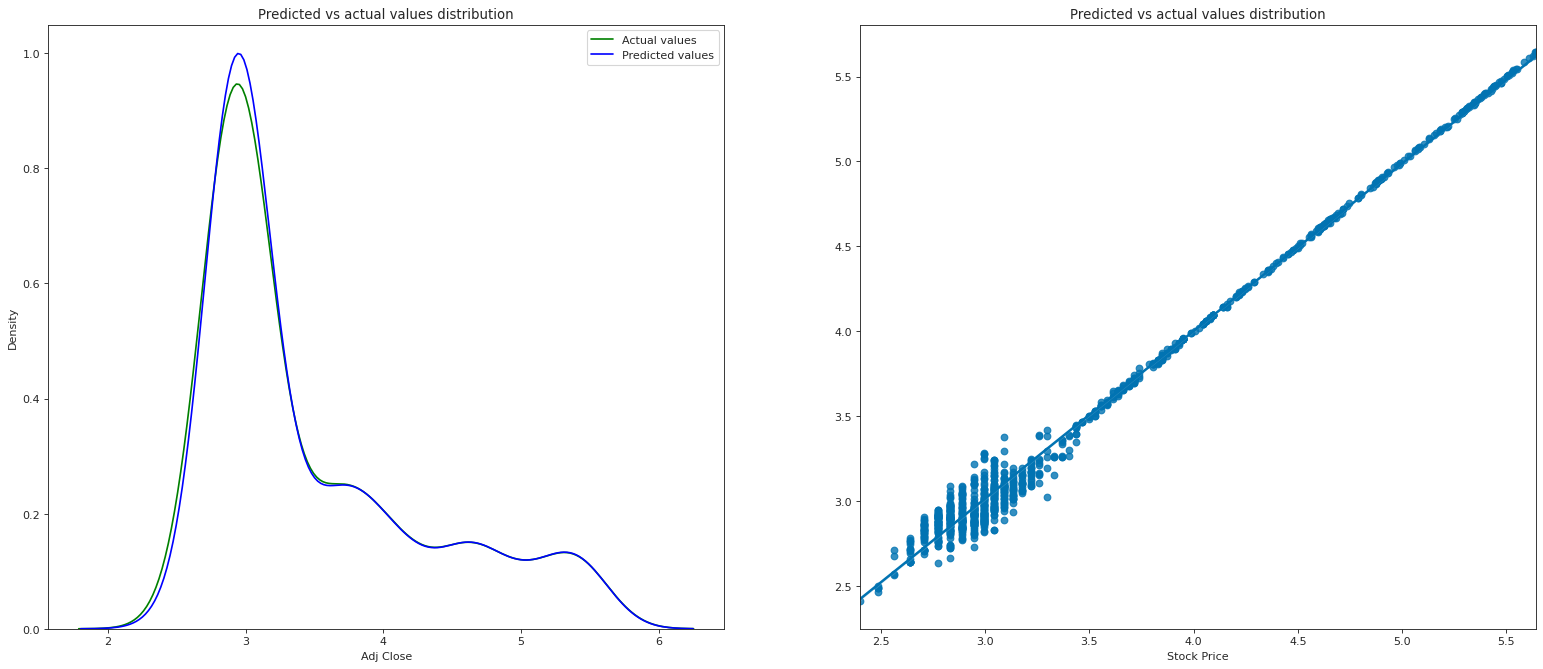

Mean absolute error of RandomForestRegressor(random_state=47): 0.04991581612908451


In [162]:
#plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predict, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=y_test, y=predict)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
#plt.legend()
ax1.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model_rf,mean_abs_error))

In [163]:
#From the above, we can see that the model is trained and evaluated using RandomForestRegressor. The predicted and actual adjustable stock prices plots look are relatively similar with a mean absolute error is 0.0498 which is good. Let us see how our three models would perfomr with the Google stocks.

#Predicting Adjusted close value of Google stocks

In [164]:
# get Google data and view the first 5 rows
googl_data = get_data(fin_data, 'GOOGL')  
googl_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2001-01-02,2.511011,2.511011,2.604104,2.401401,2.502503,893181924.0
2001-01-03,2.511011,2.511011,2.604104,2.401401,2.502503,893181924.0
2001-01-04,2.511011,2.511011,2.604104,2.401401,2.502503,893181924.0
2001-01-05,2.511011,2.511011,2.604104,2.401401,2.502503,893181924.0
2001-01-08,2.511011,2.511011,2.604104,2.401401,2.502503,893181924.0


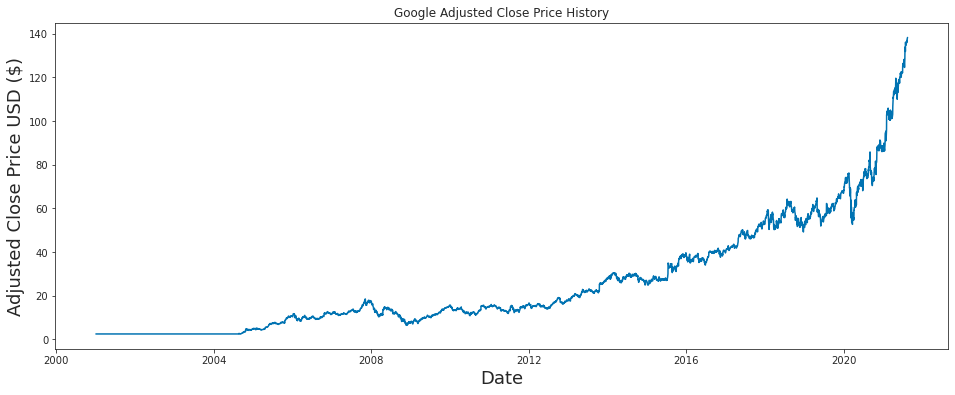

In [165]:
# plot showing Google historical Adjusted closing prices
plt.figure(figsize=(16,6))
plt.title('Google Adjusted Close Price History')
plt.plot(googl_data['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adjusted Close Price USD ($)', fontsize=18)
plt.show()

In [166]:
# Building the model for Adj close prediction

# create the variables for prediction and split into training and test sets

y = np.log(googl_data['Adj Close'].astype(int)) # we want to predict the adjusted close price
X = googl_data.drop('Adj Close', axis=1) # predictive variables (removing Adj close from it)

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (4150, 5)
y_train (4150,)
x_test (1038, 5)
y_test (1038,)


In [167]:
#Prediction Using LSTM

In [168]:
#### LSTM Model for Google stocks

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model part 5 (no activation function)
model.fit(np.array(X_train).reshape(-1,5,1), y_train, batch_size =800, epochs=50, verbose=0)

#predictions 
predictions = model.predict(np.array(X_test).reshape(-1,5,1))

#calculation of the mean absolute error
mean_abs_error = mean_absolute_error(y_test, predictions)
mean_abs_error

33/33 [==============================] - 1s 2ms/step


0.01589333584365937

In [169]:
#Prediction Using Linear Regression

In [170]:
#creating an instance of a Linear Regressor 
model_lin2 = LinearRegression()

#fit the model
model_lin2.fit(X_train,y_train)

#prediction
predict = model_lin2.predict(X_test)

#calculation of the mean absolute error
mean_abs_error = mean_absolute_error(y_test, predict)
mean_abs_error

0.17882117290858718

In [171]:
#Prediction Using Random Forest Regressor
#creating an instance of a Random Forest Regressor 
model_rf2 = RandomForestRegressor(n_estimators=100, random_state=47)

#fit the model with the training data
model_rf2.fit(X_train,y_train)

#prediction
predict2 = model_rf2.predict(X_test)
predict2 #view some predictions

#calculation of the mean absolute error
mean_abs_error2 = mean_absolute_error(y_test, predict2)
mean_abs_error2

0.0007589002884249367

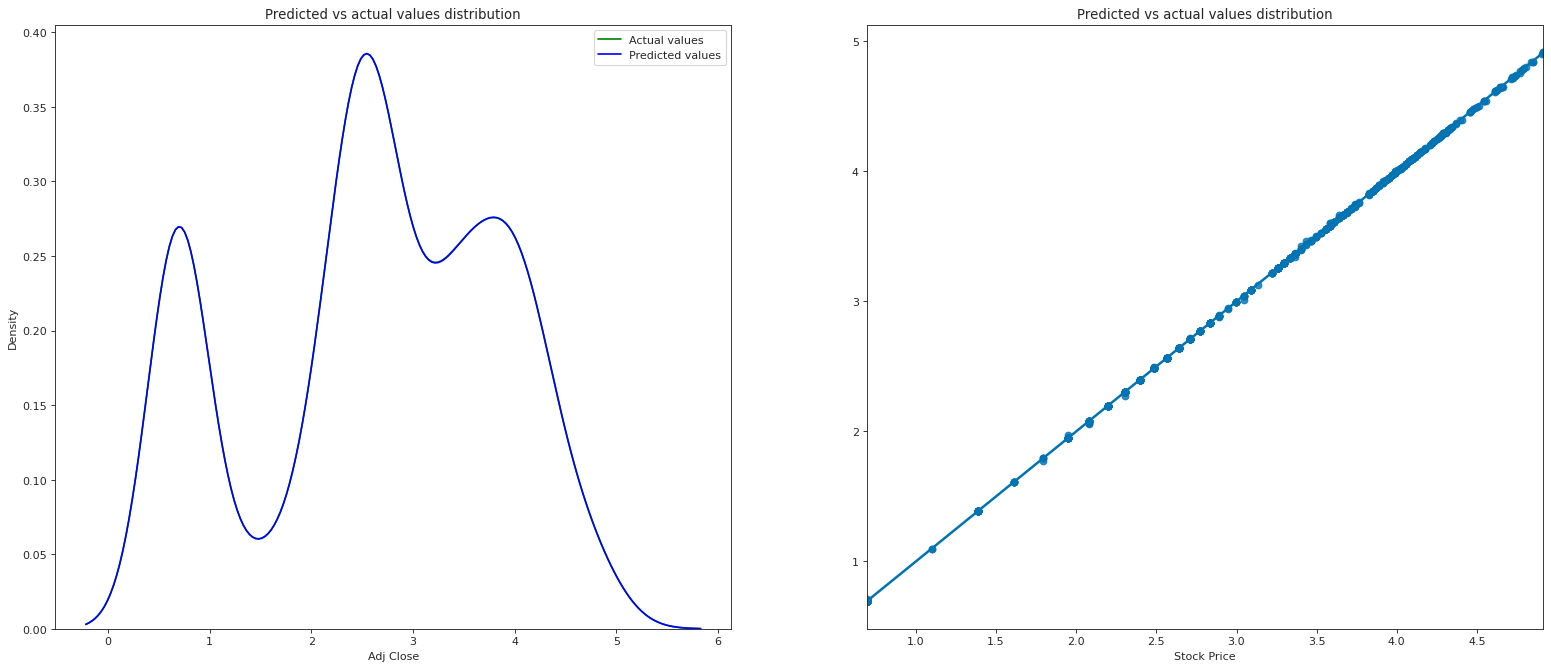

Mean absolute error of RandomForestRegressor(random_state=47): 0.0007589002884249367


In [172]:
#plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predict2, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=y_test, y=predict2)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Stock Price')
#plt.legend()
ax1.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model_rf2,mean_abs_error2))

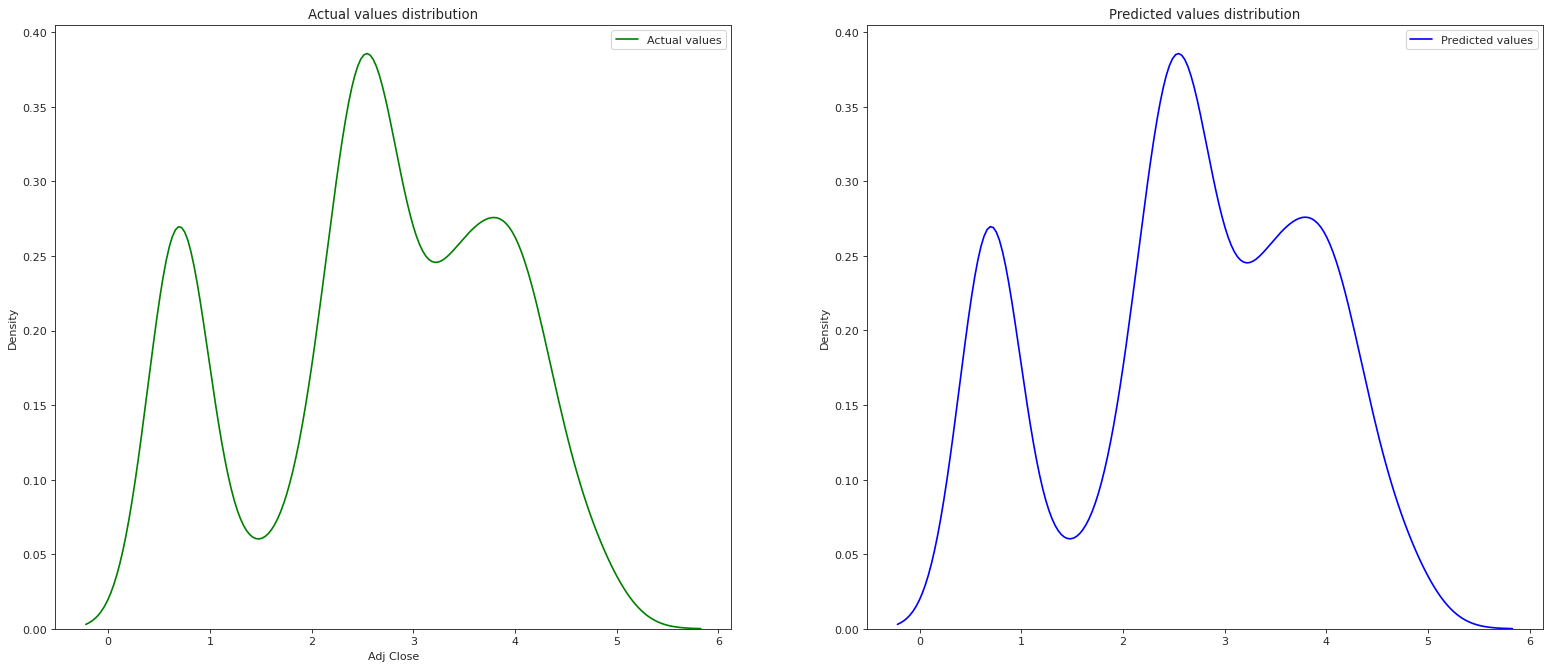

Mean absolute error of RandomForestRegressor(random_state=47): 0.0007589002884249367


In [173]:
#plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Actual values distribution')
axs[1].set_title('Predicted values distribution')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values',ax=axs[0])
ax2 = sns.kdeplot(data=predict2, color="b", label='Predicted values', ax=axs[1])

ax1.legend()
ax2.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model_rf2,mean_abs_error2))

In [174]:
#From the above, we can see that the model is trained and evaluated using RandomForestRegressor. The predicted and actual adjustable Google stock prices plots look are very similar with a mean absolute error is 0.000758 which is very good. We can also see that all three models perform better with Google than Microsoft stocks.

In [175]:
# Results
# Evaluation and Validation of models
# From my investigation of three different models, I observed that RandomForestRegressor delivered a much lower mean absolute error  than the LSTM  or LinearRegression  for Microsoft and Google respectively. I also observed that tunning the parameters for LSTM (e.g the number of epochs and batch_size) resulted in better prediction.

# Interesting facts about the project
# When exploring the data, it was interesting to see how the stock prices of different companies changed due to the pandemic and how the technological companies stock prices bounced back more quickly than the other companies considered. It was also interesting to see how Pfizer stocks improved as the vaccine rollout began.

# Here are some major highlights from the data exploration section:

# 2019: Before the pandemic, most of the companies stocks were doing relatively well with Apple and Microsoft taking the lead and Pfizer trailing behind.
# 2020: On the onset of the pandemic around Spring, there was a fall in stock prices for all the companies, but afterwards the technology companies like Amazon, Apple, Microsoft and Google started to grow again. But companies like Pfizer, Ford and S&P 500 did not do very well especially Ford.
# 2021: As the vaccine rollout began and the lockdown began to be lifted, there was significant growth in the stock prices of Ford in particular given its very stock prices which was low in 2020 due to the pandemic. Companies like Google and Microsoft,S&P 500 also grew. Overall there was an improvement in the stock prices of all the companies we considered.
# Difficulties encountered
# Getting the data from yahoo fincance wasn't very obvious. After several research I was able to find an article that guided me on how to obtain the data.
# In the modelling part (particularly the LSTM), one would have to spend some time tuning the parameters and training it to get the best results.

